In [2]:
#importing the libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import string
import re
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import sys
import string
import gensim
from gensim.models import KeyedVectors
from collections import  Counter
import spacy
from operator import itemgetter
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
#Reading the data
data = pd.read_csv("Comments.csv")
data.head(5)

,COMMENT
0,Realizing that they are in the power supply bu...
1,"Futuri has grown employment by a huge amount, ..."
2,assistance for DBO's
3,The market is shifting and we aren't adapting....
4,Quicker growth and store openings so people wi...


In [4]:
#Removing the punctuations
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

data['COMMENT'] = data['COMMENT'].apply(lambda x:remove_punctuation(x))
data['COMMENT']

0        Realizing that they are in the power supply bu...
1        Futuri has grown employment by a huge amount b...
2                                      assistance for DBOs
3        The market is shifting and we arent adapting C...
4        Quicker growth and store openings so people wi...
                               ...                        
98584                           Growing at the right speed
98585    I like that we are not doing what we have alwa...
98586    I love everything about the direction REMAX 1 ...
98587    Expanding and growing Its great to be apart of...
98588    I like that our team of workers at wesco get a...
Name: COMMENT, Length: 98589, dtype: object

In [5]:
#Lowering the lines
data['COMMENT'] = data['COMMENT'].apply(lambda x: x.lower())
data['COMMENT']

0        realizing that they are in the power supply bu...
1        futuri has grown employment by a huge amount b...
2                                      assistance for dbos
3        the market is shifting and we arent adapting c...
4        quicker growth and store openings so people wi...
                               ...                        
98584                           growing at the right speed
98585    i like that we are not doing what we have alwa...
98586    i love everything about the direction remax 1 ...
98587    expanding and growing its great to be apart of...
98588    i like that our team of workers at wesco get a...
Name: COMMENT, Length: 98589, dtype: object

In [6]:
#Removing the Stopwords
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/rutvathaker/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [7]:
#Data after removing Stopwords
data['COMMENT'] = data['COMMENT'].apply(lambda x:' '.join([i for i in x.split() if i not in stopwords]))
data['COMMENT']

0        realizing power supply business generator truc...
1        futuri grown employment huge amount doesnt see...
2                                          assistance dbos
3        market shifting arent adapting customers want ...
4        quicker growth store openings people within or...
                               ...                        
98584                                  growing right speed
98585    like always done like idea copresidency like h...
98586    love everything direction remax 1 moving feel ...
98587                        expanding growing great apart
98588    like team workers wesco get along theres littl...
Name: COMMENT, Length: 98589, dtype: object

In [8]:
#Lemmatizing the Data
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
wordnet_lemmatizer = WordNetLemmatizer()


def lemmatizer(text):
    lemm = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm
data['COMMENT']=data['COMMENT'].apply(lambda x:lemmatizer(x.split()))
data['COMMENT']

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/rutvathaker/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/rutvathaker/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0        [realizing, power, supply, business, generator...
1        [futuri, grown, employment, huge, amount, does...
2                                       [assistance, dbos]
3        [market, shifting, arent, adapting, customer, ...
4        [quicker, growth, store, opening, people, with...
                               ...                        
98584                              [growing, right, speed]
98585    [like, always, done, like, idea, copresidency,...
98586    [love, everything, direction, remax, 1, moving...
98587                   [expanding, growing, great, apart]
98588    [like, team, worker, wesco, get, along, there,...
Name: COMMENT, Length: 98589, dtype: object

In [9]:
#Reading the data
data.head()

,COMMENT
0,"[realizing, power, supply, business, generator..."
1,"[futuri, grown, employment, huge, amount, does..."
2,"[assistance, dbos]"
3,"[market, shifting, arent, adapting, customer, ..."
4,"[quicker, growth, store, opening, people, with..."


In [10]:
#Getting words dictionary without stopwords
corpus=[]
new= data['COMMENT']
new=new.values
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stopwords:
        dic[word]+=1

In [11]:
len(corpus)

1329000

In [ ]:
#Words with its count
x = Counter(corpus)
x

In [12]:
#Getting unique words dictionary without stopwords
unique=[]
for word in corpus:
    if word not in unique:
        unique.append(word)

In [103]:
len(unique)

37050

# POS using Corpus

In [13]:
#Loading package from spacy
nlp = spacy.load('en_core_web_sm')

In [15]:
#Defining the corpus document
document = nlp(str(corpus[:15000]))


In [16]:
#Using document getting Adjectives and its Count
adjs = []
for token in document:
    if token.pos_ == 'ADJ':
        adjs.append(token.text)
        
adjs_tally = Counter(adjs)
df = pd.DataFrame(adjs_tally.most_common(), columns=['adj', 'Acount'])
df = df[:100]
df

,adj,Acount
0,better,105
1,new,86
2,much,54
3,many,53
4,good,44
...,...,...
95,associate,6
96,larger,6
97,administrative,6
98,commercial,6


In [17]:
#Using document getting Noun and its Count
nouns = []
for token in document:
    if token.pos_ == 'NOUN':
        nouns.append(token.text)

nouns_tally = Counter(nouns)

dfs = pd.DataFrame(nouns_tally.most_common(),columns=['noun', 'Ncount'])
dfs = dfs[:100]
dfs

,noun,Ncount
0,',207
1,need,174
2,employee,172
3,work,139
4,people,113
...,...,...
95,policy,14
96,group,14
97,use,14
98,opinion,14


In [18]:
#Using document getting Verb and its Count
verbs = [token.text for token in document if token.pos_ == 'VERB']

verbs_tally = Counter(verbs)

dfv = pd.DataFrame(verbs_tally.most_common(), columns=['verb', 'Vcount'])
dfv = dfv[:100]
dfv

,verb,Vcount
0,feel,107
1,make,99
2,get,88
3,see,69
4,pay,62
...,...,...
95,including,8
96,becoming,8
97,build,8
98,understanding,8


In [19]:
#Using document getting Adverb and its Count
adverbs = []
for token in document:
    if token.pos_ == 'ADV':
        adverbs.append(token.text)

adverbs_tally = Counter(adverbs)

dfa = pd.DataFrame(adverbs_tally.most_common(), columns=['adverb', 'ADcount'])
dfa = dfa[:100]
dfa


,adverb,ADcount
0,also,48
1,instead,35
2,always,25
3,away,23
4,actually,22
...,...,...
95,alike,1
96,overwhelmingly,1
97,generally,1
98,correctly,1


In [20]:
#Single DataFrame of Adjective, Noun & Verb
a = dfs[["noun", "Ncount"]]
b = df.join(a)
c = dfv[['verb', 'Vcount']]
d = b.join(c)
e = dfa[['adverb', 'ADcount']]
dt = d.join(e)
dt

,adj,Acount,noun,Ncount,verb,Vcount,adverb,ADcount
0,better,105,',207,feel,107,also,48
1,new,86,need,174,make,99,instead,35
2,much,54,employee,172,get,88,always,25
3,many,53,work,139,see,69,away,23
4,good,44,people,113,pay,62,actually,22
...,...,...,...,...,...,...,...,...
95,associate,6,policy,14,including,8,alike,1
96,larger,6,group,14,becoming,8,overwhelmingly,1
97,administrative,6,use,14,build,8,generally,1
98,commercial,6,opinion,14,understanding,8,correctly,1


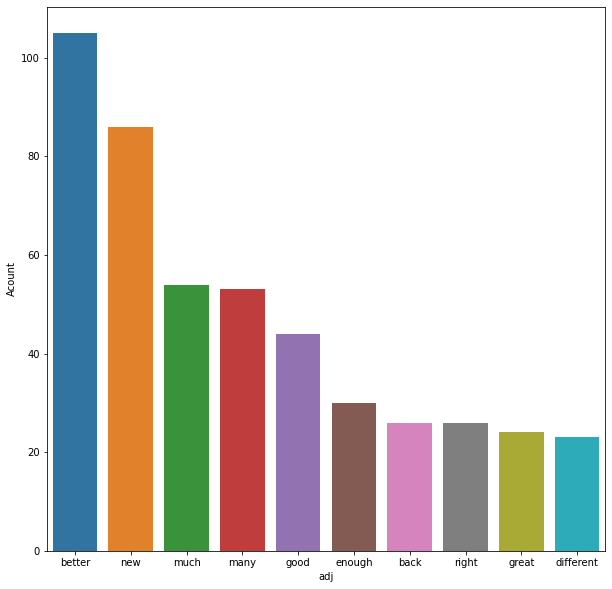

In [21]:
#Plot for Adjective and its Count
fig = plt.figure(figsize=(10,10))
sns.barplot(x=dt.adj[:10], y=dt.Acount)
plt.show()

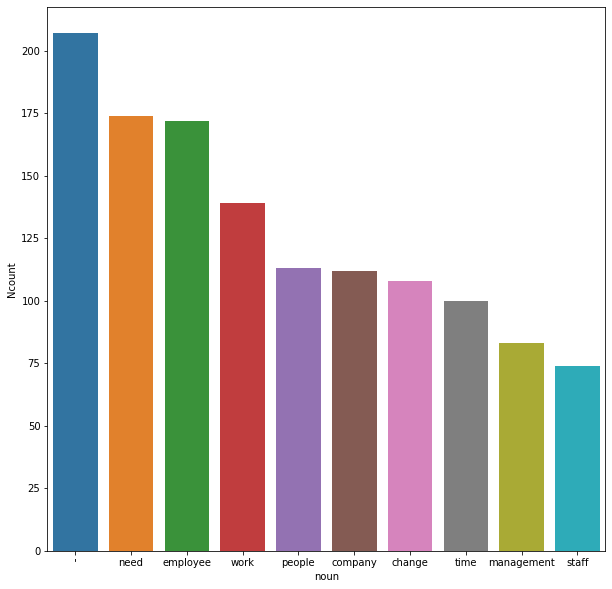

In [22]:
#Plot for Noun & its Count
fig = plt.figure(figsize=(10,10))
sns.barplot(x=dt.noun[:10], y=dt.Ncount)
plt.show()

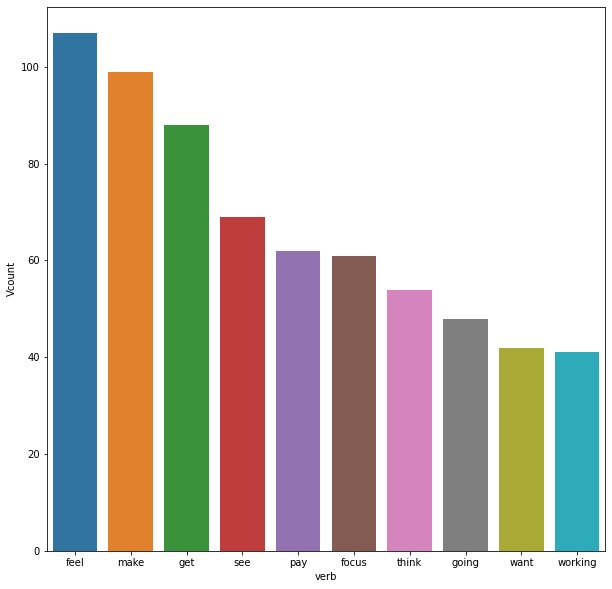

In [23]:
#Plot for Verb & its Count
fig = plt.figure(figsize=(10,10))
sns.barplot(x=dt.verb[:10], y=dt.Vcount)
plt.show()

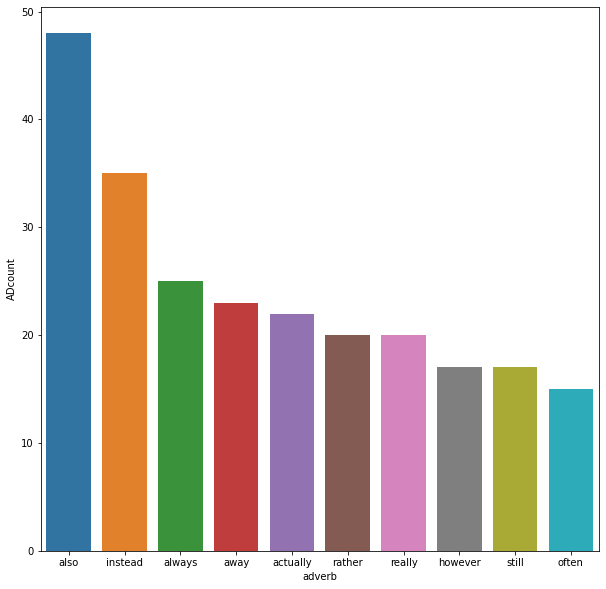

In [24]:
#Plot for Adverb & its Count
fig = plt.figure(figsize=(10,10))
sns.barplot(x=dt.adverb[:10], y=dt.ADcount)
plt.show()

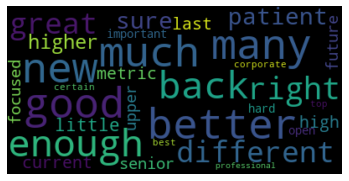

In [25]:
#WordCloud of Adjectives
word=" ".join(word for word in (dt['adj'].values))
WC = WordCloud(max_font_size=50, max_words=30, background_color="Black").generate(word)
plt.imshow(WC, interpolation = 'bilinear') 
plt.axis('off')
plt.show()


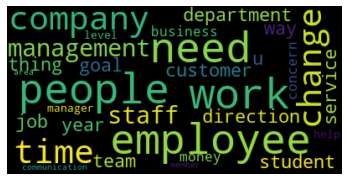

In [26]:
#WordCloud of Nouns
word=" ".join(word for word in (dt['noun'].values))
WC = WordCloud(max_font_size=50, max_words=30, background_color="Black").generate(word)
plt.imshow(WC, interpolation = 'bilinear') 
plt.axis('off')
plt.show()

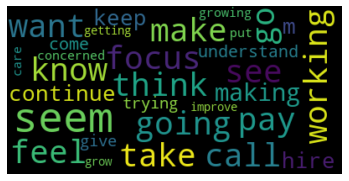

In [27]:
#WordCloud of Verbs
word=" ".join(word for word in (dt['verb'].values))
WC = WordCloud(max_font_size=50, max_words=30, background_color="Black").generate(word)
plt.imshow(WC, interpolation = 'bilinear') 
plt.axis('off')
plt.show()


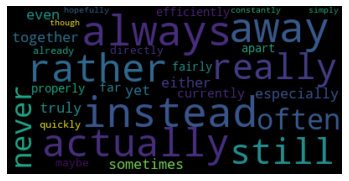

In [28]:
#WordCloud of Adverbs
word=" ".join(word for word in (dt['adverb'].values))
WC = WordCloud(max_font_size=50, max_words=30, background_color="Black").generate(word)
plt.imshow(WC, interpolation = 'bilinear') 
plt.axis('off')
plt.show()


In [29]:
#Getting vectors for adjectives
adjs_words = list(set([word for sublist in [document.split() for document in adjs] for word in sublist]))

word_adjs_vectors = np.array([nlp(word).vector for word in adjs_words])
df1 = pd.DataFrame(word_adjs_vectors, index=adjs_words)
df1

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
transitional,-1.191627,-0.096339,0.268463,1.067400,-0.104154,-0.667713,-0.244266,-0.126073,0.354152,-0.250273,...,-0.397189,-0.041924,-0.250517,0.449590,1.057575,0.052906,0.611200,-0.499222,1.175307,-0.787830
scan,-0.610111,-0.708329,1.275022,0.426838,0.107882,-0.076758,-0.599254,1.502248,-0.304917,-0.676066,...,1.083254,0.388807,-0.482751,-0.536895,-0.282772,-0.776279,0.389735,0.575097,-0.232227,0.663025
impossible,-1.120235,-0.220768,0.014776,0.402755,0.340912,-0.501197,-0.172089,0.690255,0.512134,-0.389166,...,-1.217436,-0.258522,-0.547388,0.293729,2.274259,-0.009794,0.698326,-0.005204,1.579491,-0.435734
unique,-1.023547,0.523175,0.937803,-0.202497,-0.750866,-0.182289,-0.200924,0.948607,0.206747,0.410020,...,-0.203553,-0.311521,-0.509540,0.337455,1.405769,-0.207678,-0.020608,0.284159,0.959351,-0.215062
communicative,-1.441023,0.681586,0.645300,0.629125,-0.529227,-0.781978,0.204435,0.492617,0.365039,-0.227376,...,-0.194003,-0.523386,-0.441781,0.197085,0.933780,-0.011058,1.726489,0.382462,0.706260,-0.435092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
trustworthy,-0.552425,-0.182589,0.197622,0.368517,0.104736,-0.242823,-0.304268,0.449983,-0.702685,0.562269,...,-1.024680,-0.217689,-0.706086,-0.310624,0.796963,0.057799,0.056880,0.245437,1.780566,1.189645
volumedial,-1.261052,-0.100945,0.087671,0.981440,-1.084659,-0.250343,-0.049268,0.320345,0.519849,0.148832,...,-0.257802,-0.916388,-0.617873,-0.313811,0.057993,-0.749011,1.067941,0.395726,0.985104,0.353304
comfortable,-0.845356,0.777846,0.103007,0.511190,-0.740618,-0.433949,-0.283085,0.647309,-0.163272,-0.100898,...,-0.575616,-1.095864,-0.886069,0.887900,1.990195,0.385675,1.415364,-0.409599,1.563556,-0.138204
elective,-0.993556,0.166301,0.352411,1.335307,-0.430864,-0.098745,-0.496027,-0.478282,0.292299,-0.930969,...,-0.464637,-0.320193,-0.546286,0.484697,0.872153,-0.193156,0.150209,0.055545,1.675304,0.090657


In [30]:
#Resetting the index
df1.reset_index(level=0, inplace=True)
df1

,index,0,1,2,3,4,5,6,7,8,...,86,87,88,89,90,91,92,93,94,95
0,transitional,-1.191627,-0.096339,0.268463,1.067400,-0.104154,-0.667713,-0.244266,-0.126073,0.354152,...,-0.397189,-0.041924,-0.250517,0.449590,1.057575,0.052906,0.611200,-0.499222,1.175307,-0.787830
1,scan,-0.610111,-0.708329,1.275022,0.426838,0.107882,-0.076758,-0.599254,1.502248,-0.304917,...,1.083254,0.388807,-0.482751,-0.536895,-0.282772,-0.776279,0.389735,0.575097,-0.232227,0.663025
2,impossible,-1.120235,-0.220768,0.014776,0.402755,0.340912,-0.501197,-0.172089,0.690255,0.512134,...,-1.217436,-0.258522,-0.547388,0.293729,2.274259,-0.009794,0.698326,-0.005204,1.579491,-0.435734
3,unique,-1.023547,0.523175,0.937803,-0.202497,-0.750866,-0.182289,-0.200924,0.948607,0.206747,...,-0.203553,-0.311521,-0.509540,0.337455,1.405769,-0.207678,-0.020608,0.284159,0.959351,-0.215062
4,communicative,-1.441023,0.681586,0.645300,0.629125,-0.529227,-0.781978,0.204435,0.492617,0.365039,...,-0.194003,-0.523386,-0.441781,0.197085,0.933780,-0.011058,1.726489,0.382462,0.706260,-0.435092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,trustworthy,-0.552425,-0.182589,0.197622,0.368517,0.104736,-0.242823,-0.304268,0.449983,-0.702685,...,-1.024680,-0.217689,-0.706086,-0.310624,0.796963,0.057799,0.056880,0.245437,1.780566,1.189645
726,volumedial,-1.261052,-0.100945,0.087671,0.981440,-1.084659,-0.250343,-0.049268,0.320345,0.519849,...,-0.257802,-0.916388,-0.617873,-0.313811,0.057993,-0.749011,1.067941,0.395726,0.985104,0.353304
727,comfortable,-0.845356,0.777846,0.103007,0.511190,-0.740618,-0.433949,-0.283085,0.647309,-0.163272,...,-0.575616,-1.095864,-0.886069,0.887900,1.990195,0.385675,1.415364,-0.409599,1.563556,-0.138204
728,elective,-0.993556,0.166301,0.352411,1.335307,-0.430864,-0.098745,-0.496027,-0.478282,0.292299,...,-0.464637,-0.320193,-0.546286,0.484697,0.872153,-0.193156,0.150209,0.055545,1.675304,0.090657


In [31]:
#Renaming the index 
df1.rename({'index': 'Adjectives'}, axis=1, inplace=True)
df1

,Adjectives,0,1,2,3,4,5,6,7,8,...,86,87,88,89,90,91,92,93,94,95
0,transitional,-1.191627,-0.096339,0.268463,1.067400,-0.104154,-0.667713,-0.244266,-0.126073,0.354152,...,-0.397189,-0.041924,-0.250517,0.449590,1.057575,0.052906,0.611200,-0.499222,1.175307,-0.787830
1,scan,-0.610111,-0.708329,1.275022,0.426838,0.107882,-0.076758,-0.599254,1.502248,-0.304917,...,1.083254,0.388807,-0.482751,-0.536895,-0.282772,-0.776279,0.389735,0.575097,-0.232227,0.663025
2,impossible,-1.120235,-0.220768,0.014776,0.402755,0.340912,-0.501197,-0.172089,0.690255,0.512134,...,-1.217436,-0.258522,-0.547388,0.293729,2.274259,-0.009794,0.698326,-0.005204,1.579491,-0.435734
3,unique,-1.023547,0.523175,0.937803,-0.202497,-0.750866,-0.182289,-0.200924,0.948607,0.206747,...,-0.203553,-0.311521,-0.509540,0.337455,1.405769,-0.207678,-0.020608,0.284159,0.959351,-0.215062
4,communicative,-1.441023,0.681586,0.645300,0.629125,-0.529227,-0.781978,0.204435,0.492617,0.365039,...,-0.194003,-0.523386,-0.441781,0.197085,0.933780,-0.011058,1.726489,0.382462,0.706260,-0.435092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,trustworthy,-0.552425,-0.182589,0.197622,0.368517,0.104736,-0.242823,-0.304268,0.449983,-0.702685,...,-1.024680,-0.217689,-0.706086,-0.310624,0.796963,0.057799,0.056880,0.245437,1.780566,1.189645
726,volumedial,-1.261052,-0.100945,0.087671,0.981440,-1.084659,-0.250343,-0.049268,0.320345,0.519849,...,-0.257802,-0.916388,-0.617873,-0.313811,0.057993,-0.749011,1.067941,0.395726,0.985104,0.353304
727,comfortable,-0.845356,0.777846,0.103007,0.511190,-0.740618,-0.433949,-0.283085,0.647309,-0.163272,...,-0.575616,-1.095864,-0.886069,0.887900,1.990195,0.385675,1.415364,-0.409599,1.563556,-0.138204
728,elective,-0.993556,0.166301,0.352411,1.335307,-0.430864,-0.098745,-0.496027,-0.478282,0.292299,...,-0.464637,-0.320193,-0.546286,0.484697,0.872153,-0.193156,0.150209,0.055545,1.675304,0.090657


In [32]:
#Getting vectors for nouns
nouns_words = list(set([word for sublist in [document.split() for document in nouns] for word in sublist]))

word_nouns_vectors = np.array([nlp(word).vector for word in nouns_words])
df2 = pd.DataFrame(word_nouns_vectors, index=nouns_words)
df2

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
gear,-0.852083,-0.672338,0.179027,0.895121,0.664613,0.238715,-0.275603,0.813164,-0.122302,0.516418,...,-0.035182,0.538901,-1.011828,0.149035,-1.581536,-0.404018,-0.934914,0.102658,1.623481,-0.406789
claim,-0.317705,0.106646,0.545570,0.381521,0.090030,0.457393,0.451590,0.857127,-0.231495,0.145546,...,0.811881,-0.306930,-0.196692,0.663982,-1.676716,-0.930061,-0.794602,0.232828,1.217351,0.326925
era,-0.265005,-0.247099,0.352210,-0.668797,0.271529,0.669287,-0.699086,0.366453,0.281160,0.487815,...,-0.182197,0.512062,-1.539045,-0.167432,-0.506022,-0.432602,-0.911521,0.416113,1.211912,-0.072659
forecast,-0.716312,-0.444409,1.236617,-0.314472,0.652007,0.244191,-0.793902,0.840435,-0.284307,0.570922,...,0.342501,-0.357367,-0.626259,-0.506847,-1.362795,-0.713158,-1.494211,0.607106,0.938288,-0.005054
tmobile,0.407497,-0.243888,-0.030143,0.490425,0.295151,-0.460714,-0.088589,0.632120,-0.706055,-0.572897,...,1.014076,-0.652587,-0.990404,0.250919,-1.288145,-0.634501,-0.743437,-0.539408,1.023029,1.186394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
reinvent,-0.532768,-0.257406,0.228590,0.397596,0.824770,0.084183,-0.741599,1.080239,-0.196911,0.793150,...,0.039036,0.359597,0.234465,-0.312887,-1.789947,-0.616463,-0.148096,1.352131,0.868931,0.514345
bpm,-0.421092,-1.260067,0.544979,0.789883,-0.538355,-0.610880,0.410009,1.568571,-1.129817,-0.095887,...,1.276038,-0.934645,-0.466051,-0.106119,-0.364718,-0.761986,-0.237726,0.418838,0.289383,0.658910
attitude,-0.109649,-0.263645,0.478554,0.204902,0.118714,0.653623,-0.396535,0.969327,0.032319,0.042388,...,0.020223,-0.107446,-1.349264,0.031555,-0.728725,-0.024502,-1.074200,0.159268,0.859931,0.472780
complaint,-0.854789,0.016987,0.336428,0.467096,0.424540,-0.232473,0.203097,1.166816,-0.507190,0.199957,...,-0.445959,0.761228,-0.820927,-0.843458,-0.870116,-0.304572,-1.041904,0.849149,0.979698,0.156356


In [33]:
#Resetting the index
df2.reset_index(level=0, inplace=True)
df2

,index,0,1,2,3,4,5,6,7,8,...,86,87,88,89,90,91,92,93,94,95
0,gear,-0.852083,-0.672338,0.179027,0.895121,0.664613,0.238715,-0.275603,0.813164,-0.122302,...,-0.035182,0.538901,-1.011828,0.149035,-1.581536,-0.404018,-0.934914,0.102658,1.623481,-0.406789
1,claim,-0.317705,0.106646,0.545570,0.381521,0.090030,0.457393,0.451590,0.857127,-0.231495,...,0.811881,-0.306930,-0.196692,0.663982,-1.676716,-0.930061,-0.794602,0.232828,1.217351,0.326925
2,era,-0.265005,-0.247099,0.352210,-0.668797,0.271529,0.669287,-0.699086,0.366453,0.281160,...,-0.182197,0.512062,-1.539045,-0.167432,-0.506022,-0.432602,-0.911521,0.416113,1.211912,-0.072659
3,forecast,-0.716312,-0.444409,1.236617,-0.314472,0.652007,0.244191,-0.793902,0.840435,-0.284307,...,0.342501,-0.357367,-0.626259,-0.506847,-1.362795,-0.713158,-1.494211,0.607106,0.938288,-0.005054
4,tmobile,0.407497,-0.243888,-0.030143,0.490425,0.295151,-0.460714,-0.088589,0.632120,-0.706055,...,1.014076,-0.652587,-0.990404,0.250919,-1.288145,-0.634501,-0.743437,-0.539408,1.023029,1.186394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1385,reinvent,-0.532768,-0.257406,0.228590,0.397596,0.824770,0.084183,-0.741599,1.080239,-0.196911,...,0.039036,0.359597,0.234465,-0.312887,-1.789947,-0.616463,-0.148096,1.352131,0.868931,0.514345
1386,bpm,-0.421092,-1.260067,0.544979,0.789883,-0.538355,-0.610880,0.410009,1.568571,-1.129817,...,1.276038,-0.934645,-0.466051,-0.106119,-0.364718,-0.761986,-0.237726,0.418838,0.289383,0.658910
1387,attitude,-0.109649,-0.263645,0.478554,0.204902,0.118714,0.653623,-0.396535,0.969327,0.032319,...,0.020223,-0.107446,-1.349264,0.031555,-0.728725,-0.024502,-1.074200,0.159268,0.859931,0.472780
1388,complaint,-0.854789,0.016987,0.336428,0.467096,0.424540,-0.232473,0.203097,1.166816,-0.507190,...,-0.445959,0.761228,-0.820927,-0.843458,-0.870116,-0.304572,-1.041904,0.849149,0.979698,0.156356


In [34]:
#Renaming the index 
df2.rename({'index': 'Nouns'}, axis=1, inplace=True)
df2

,Nouns,0,1,2,3,4,5,6,7,8,...,86,87,88,89,90,91,92,93,94,95
0,gear,-0.852083,-0.672338,0.179027,0.895121,0.664613,0.238715,-0.275603,0.813164,-0.122302,...,-0.035182,0.538901,-1.011828,0.149035,-1.581536,-0.404018,-0.934914,0.102658,1.623481,-0.406789
1,claim,-0.317705,0.106646,0.545570,0.381521,0.090030,0.457393,0.451590,0.857127,-0.231495,...,0.811881,-0.306930,-0.196692,0.663982,-1.676716,-0.930061,-0.794602,0.232828,1.217351,0.326925
2,era,-0.265005,-0.247099,0.352210,-0.668797,0.271529,0.669287,-0.699086,0.366453,0.281160,...,-0.182197,0.512062,-1.539045,-0.167432,-0.506022,-0.432602,-0.911521,0.416113,1.211912,-0.072659
3,forecast,-0.716312,-0.444409,1.236617,-0.314472,0.652007,0.244191,-0.793902,0.840435,-0.284307,...,0.342501,-0.357367,-0.626259,-0.506847,-1.362795,-0.713158,-1.494211,0.607106,0.938288,-0.005054
4,tmobile,0.407497,-0.243888,-0.030143,0.490425,0.295151,-0.460714,-0.088589,0.632120,-0.706055,...,1.014076,-0.652587,-0.990404,0.250919,-1.288145,-0.634501,-0.743437,-0.539408,1.023029,1.186394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1385,reinvent,-0.532768,-0.257406,0.228590,0.397596,0.824770,0.084183,-0.741599,1.080239,-0.196911,...,0.039036,0.359597,0.234465,-0.312887,-1.789947,-0.616463,-0.148096,1.352131,0.868931,0.514345
1386,bpm,-0.421092,-1.260067,0.544979,0.789883,-0.538355,-0.610880,0.410009,1.568571,-1.129817,...,1.276038,-0.934645,-0.466051,-0.106119,-0.364718,-0.761986,-0.237726,0.418838,0.289383,0.658910
1387,attitude,-0.109649,-0.263645,0.478554,0.204902,0.118714,0.653623,-0.396535,0.969327,0.032319,...,0.020223,-0.107446,-1.349264,0.031555,-0.728725,-0.024502,-1.074200,0.159268,0.859931,0.472780
1388,complaint,-0.854789,0.016987,0.336428,0.467096,0.424540,-0.232473,0.203097,1.166816,-0.507190,...,-0.445959,0.761228,-0.820927,-0.843458,-0.870116,-0.304572,-1.041904,0.849149,0.979698,0.156356


In [35]:
#Getting vectors for verbs
verbs_words = list(set([word for sublist in [document.split() for document in verbs] for word in sublist]))

word_verbs_vectors = np.array([nlp(word).vector for word in verbs_words])
df3 = pd.DataFrame(word_verbs_vectors, index=verbs_words)
df3

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
focus,-0.663509,-0.217897,0.802128,0.665642,0.173577,0.177560,0.133054,0.799104,-0.343226,-0.539709,...,0.817392,-0.117667,-0.451730,0.935593,-0.867922,-0.237105,-0.303366,0.605184,0.439697,0.083930
waiting,-1.387239,-0.853075,-0.394118,2.995854,0.762923,-0.791926,0.484906,1.201562,0.152828,-0.809449,...,0.383029,0.585796,-0.676596,1.247655,0.126354,0.055320,-0.598859,0.275887,1.325695,-0.192288
causing,-1.215268,-0.739146,-0.675250,2.701484,0.287436,-0.122452,0.276894,1.286035,-0.215808,-0.851431,...,-0.391119,0.160967,0.047570,1.458286,-0.446426,0.040981,-1.355399,-0.089054,0.898685,0.074573
managing,-0.998869,-0.648688,-0.670504,2.101493,0.455474,-0.731716,1.091236,1.059065,-0.595687,-0.317523,...,0.047246,-0.965875,-0.522616,1.025634,-0.532051,-0.006633,-0.227883,0.534165,1.602209,-0.431532
fails,-0.757565,0.400379,-0.047666,0.653475,-0.575672,-0.665432,-0.536631,1.184796,-1.071438,-1.195115,...,1.811146,0.543119,0.386721,1.912105,0.750796,0.410304,0.184460,-0.372184,0.189137,0.568604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
show,0.067615,-1.035421,0.217289,0.102582,0.147910,0.052588,0.435722,1.232272,0.000080,0.265324,...,-0.055799,0.528860,-0.799968,0.416811,-0.257075,-1.154062,-0.964414,-0.231470,1.023700,0.153221
fixing,-1.266040,-0.404995,-0.368159,2.592010,0.379167,-0.395698,0.307449,0.755307,-0.319104,-0.406761,...,0.372822,-0.268132,-0.818605,1.818761,-0.108574,0.254463,-1.427985,-0.071120,1.157124,0.002952
written,-0.744287,-0.075966,0.809738,0.058784,-0.063466,-0.323218,-0.754509,0.232223,-0.203482,0.154455,...,0.038671,-0.375673,-0.436027,2.147851,0.259371,0.885387,-1.601683,0.695766,0.379479,0.825354
execute,-0.767900,0.013998,-0.145192,0.712245,0.229452,-0.347589,0.693836,0.621994,0.059438,-0.172958,...,0.820838,0.508203,-0.727095,1.352479,-1.261876,-0.890415,-0.727577,0.459963,1.405158,0.084336


In [36]:
#Resetting the index
df3.reset_index(level=0, inplace=True)
df3

,index,0,1,2,3,4,5,6,7,8,...,86,87,88,89,90,91,92,93,94,95
0,focus,-0.663509,-0.217897,0.802128,0.665642,0.173577,0.177560,0.133054,0.799104,-0.343226,...,0.817392,-0.117667,-0.451730,0.935593,-0.867922,-0.237105,-0.303366,0.605184,0.439697,0.083930
1,waiting,-1.387239,-0.853075,-0.394118,2.995854,0.762923,-0.791926,0.484906,1.201562,0.152828,...,0.383029,0.585796,-0.676596,1.247655,0.126354,0.055320,-0.598859,0.275887,1.325695,-0.192288
2,causing,-1.215268,-0.739146,-0.675250,2.701484,0.287436,-0.122452,0.276894,1.286035,-0.215808,...,-0.391119,0.160967,0.047570,1.458286,-0.446426,0.040981,-1.355399,-0.089054,0.898685,0.074573
3,managing,-0.998869,-0.648688,-0.670504,2.101493,0.455474,-0.731716,1.091236,1.059065,-0.595687,...,0.047246,-0.965875,-0.522616,1.025634,-0.532051,-0.006633,-0.227883,0.534165,1.602209,-0.431532
4,fails,-0.757565,0.400379,-0.047666,0.653475,-0.575672,-0.665432,-0.536631,1.184796,-1.071438,...,1.811146,0.543119,0.386721,1.912105,0.750796,0.410304,0.184460,-0.372184,0.189137,0.568604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,show,0.067615,-1.035421,0.217289,0.102582,0.147910,0.052588,0.435722,1.232272,0.000080,...,-0.055799,0.528860,-0.799968,0.416811,-0.257075,-1.154062,-0.964414,-0.231470,1.023700,0.153221
1002,fixing,-1.266040,-0.404995,-0.368159,2.592010,0.379167,-0.395698,0.307449,0.755307,-0.319104,...,0.372822,-0.268132,-0.818605,1.818761,-0.108574,0.254463,-1.427985,-0.071120,1.157124,0.002952
1003,written,-0.744287,-0.075966,0.809738,0.058784,-0.063466,-0.323218,-0.754509,0.232223,-0.203482,...,0.038671,-0.375673,-0.436027,2.147851,0.259371,0.885387,-1.601683,0.695766,0.379479,0.825354
1004,execute,-0.767900,0.013998,-0.145192,0.712245,0.229452,-0.347589,0.693836,0.621994,0.059438,...,0.820838,0.508203,-0.727095,1.352479,-1.261876,-0.890415,-0.727577,0.459963,1.405158,0.084336


In [37]:
#Renaming the index 
df3.rename({'index': 'Verbs'}, axis=1, inplace=True)
df3

,Verbs,0,1,2,3,4,5,6,7,8,...,86,87,88,89,90,91,92,93,94,95
0,focus,-0.663509,-0.217897,0.802128,0.665642,0.173577,0.177560,0.133054,0.799104,-0.343226,...,0.817392,-0.117667,-0.451730,0.935593,-0.867922,-0.237105,-0.303366,0.605184,0.439697,0.083930
1,waiting,-1.387239,-0.853075,-0.394118,2.995854,0.762923,-0.791926,0.484906,1.201562,0.152828,...,0.383029,0.585796,-0.676596,1.247655,0.126354,0.055320,-0.598859,0.275887,1.325695,-0.192288
2,causing,-1.215268,-0.739146,-0.675250,2.701484,0.287436,-0.122452,0.276894,1.286035,-0.215808,...,-0.391119,0.160967,0.047570,1.458286,-0.446426,0.040981,-1.355399,-0.089054,0.898685,0.074573
3,managing,-0.998869,-0.648688,-0.670504,2.101493,0.455474,-0.731716,1.091236,1.059065,-0.595687,...,0.047246,-0.965875,-0.522616,1.025634,-0.532051,-0.006633,-0.227883,0.534165,1.602209,-0.431532
4,fails,-0.757565,0.400379,-0.047666,0.653475,-0.575672,-0.665432,-0.536631,1.184796,-1.071438,...,1.811146,0.543119,0.386721,1.912105,0.750796,0.410304,0.184460,-0.372184,0.189137,0.568604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,show,0.067615,-1.035421,0.217289,0.102582,0.147910,0.052588,0.435722,1.232272,0.000080,...,-0.055799,0.528860,-0.799968,0.416811,-0.257075,-1.154062,-0.964414,-0.231470,1.023700,0.153221
1002,fixing,-1.266040,-0.404995,-0.368159,2.592010,0.379167,-0.395698,0.307449,0.755307,-0.319104,...,0.372822,-0.268132,-0.818605,1.818761,-0.108574,0.254463,-1.427985,-0.071120,1.157124,0.002952
1003,written,-0.744287,-0.075966,0.809738,0.058784,-0.063466,-0.323218,-0.754509,0.232223,-0.203482,...,0.038671,-0.375673,-0.436027,2.147851,0.259371,0.885387,-1.601683,0.695766,0.379479,0.825354
1004,execute,-0.767900,0.013998,-0.145192,0.712245,0.229452,-0.347589,0.693836,0.621994,0.059438,...,0.820838,0.508203,-0.727095,1.352479,-1.261876,-0.890415,-0.727577,0.459963,1.405158,0.084336


In [38]:
#Getting vectors for adverbs
adverbs_words = list(set([word for sublist in [document.split() for document in adverbs] for word in sublist]))

word_adverbs_vectors = np.array([nlp(word).vector for word in adverbs_words])
df4 = pd.DataFrame(word_adverbs_vectors, index=adverbs_words)
df4

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
blatantly,0.253264,-0.557297,0.064702,-0.486079,0.201927,-0.691392,-0.215621,-0.738653,-0.418276,-1.303333,...,-0.634480,0.061355,0.054764,-0.591344,-0.251989,1.018108,-0.708190,-0.216621,1.566167,1.202509
selectively,0.316382,-0.688075,2.065651,0.042072,-0.600811,0.385369,-0.430755,0.509239,0.029799,-0.010762,...,-1.224287,-0.617638,-0.714584,-0.770813,0.808344,0.559265,-0.485519,0.080977,1.525191,-0.162093
financially,-0.334889,-0.712790,0.297335,0.287182,-0.268799,-0.480612,-0.828167,0.369469,0.239342,-0.142850,...,-0.804567,-0.189193,0.223676,-0.660361,1.278810,0.506292,-1.282180,0.617328,1.315952,0.310962
additionally,0.482912,-0.747415,-0.198652,-0.194407,0.220358,-0.424144,-0.622010,0.090964,-0.458406,-0.809444,...,-1.766068,-0.511335,0.044694,-1.057407,0.889292,0.320010,-1.784251,0.666393,0.880633,0.844069
constantly,0.237167,-0.813756,-0.134478,-0.039856,0.158055,-0.408625,-0.563024,0.353326,-0.402879,-0.892377,...,-0.708807,-0.185418,0.081157,-0.259847,0.152029,0.095111,-0.757057,-0.316720,1.519983,0.126492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
authentically,-0.243979,-0.561095,0.209761,-0.064083,0.221430,-0.698623,-0.652026,0.060699,-0.593176,-0.711743,...,-0.515009,-0.192655,-0.063908,-0.431236,0.913585,1.418913,-1.033755,-0.719318,1.015449,1.764186
os,-0.520579,-0.505384,0.079900,-0.497754,0.718983,0.100070,0.586847,0.310246,-0.916430,0.035239,...,-0.168854,-0.239610,-0.830767,-0.826816,-0.177024,0.140145,0.204301,-0.355282,1.073735,1.046980
quickly,-0.672797,-0.868640,0.732031,0.431146,0.516423,-0.247316,-0.111060,0.173404,0.055664,-0.309253,...,-0.814720,-1.015950,-0.493661,-0.312262,0.161859,0.668818,-0.839583,-0.350511,1.098703,0.149339
negatively,-0.381558,-1.399101,0.102158,0.300681,-0.054182,-0.472629,-0.120821,0.271891,0.000081,-1.199229,...,-0.121097,-0.178687,-0.320056,-0.602758,0.402246,1.074514,-1.018709,-0.455644,0.885479,0.285503


In [39]:
#Resetting the index
df4.reset_index(level=0, inplace=True)
df4

,index,0,1,2,3,4,5,6,7,8,...,86,87,88,89,90,91,92,93,94,95
0,blatantly,0.253264,-0.557297,0.064702,-0.486079,0.201927,-0.691392,-0.215621,-0.738653,-0.418276,...,-0.634480,0.061355,0.054764,-0.591344,-0.251989,1.018108,-0.708190,-0.216621,1.566167,1.202509
1,selectively,0.316382,-0.688075,2.065651,0.042072,-0.600811,0.385369,-0.430755,0.509239,0.029799,...,-1.224287,-0.617638,-0.714584,-0.770813,0.808344,0.559265,-0.485519,0.080977,1.525191,-0.162093
2,financially,-0.334889,-0.712790,0.297335,0.287182,-0.268799,-0.480612,-0.828167,0.369469,0.239342,...,-0.804567,-0.189193,0.223676,-0.660361,1.278810,0.506292,-1.282180,0.617328,1.315952,0.310962
3,additionally,0.482912,-0.747415,-0.198652,-0.194407,0.220358,-0.424144,-0.622010,0.090964,-0.458406,...,-1.766068,-0.511335,0.044694,-1.057407,0.889292,0.320010,-1.784251,0.666393,0.880633,0.844069
4,constantly,0.237167,-0.813756,-0.134478,-0.039856,0.158055,-0.408625,-0.563024,0.353326,-0.402879,...,-0.708807,-0.185418,0.081157,-0.259847,0.152029,0.095111,-0.757057,-0.316720,1.519983,0.126492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,authentically,-0.243979,-0.561095,0.209761,-0.064083,0.221430,-0.698623,-0.652026,0.060699,-0.593176,...,-0.515009,-0.192655,-0.063908,-0.431236,0.913585,1.418913,-1.033755,-0.719318,1.015449,1.764186
170,os,-0.520579,-0.505384,0.079900,-0.497754,0.718983,0.100070,0.586847,0.310246,-0.916430,...,-0.168854,-0.239610,-0.830767,-0.826816,-0.177024,0.140145,0.204301,-0.355282,1.073735,1.046980
171,quickly,-0.672797,-0.868640,0.732031,0.431146,0.516423,-0.247316,-0.111060,0.173404,0.055664,...,-0.814720,-1.015950,-0.493661,-0.312262,0.161859,0.668818,-0.839583,-0.350511,1.098703,0.149339
172,negatively,-0.381558,-1.399101,0.102158,0.300681,-0.054182,-0.472629,-0.120821,0.271891,0.000081,...,-0.121097,-0.178687,-0.320056,-0.602758,0.402246,1.074514,-1.018709,-0.455644,0.885479,0.285503


In [40]:
#Renaming the index 
df4.rename({'index': 'Adverbs'}, axis=1, inplace=True)
df4

,Adverbs,0,1,2,3,4,5,6,7,8,...,86,87,88,89,90,91,92,93,94,95
0,blatantly,0.253264,-0.557297,0.064702,-0.486079,0.201927,-0.691392,-0.215621,-0.738653,-0.418276,...,-0.634480,0.061355,0.054764,-0.591344,-0.251989,1.018108,-0.708190,-0.216621,1.566167,1.202509
1,selectively,0.316382,-0.688075,2.065651,0.042072,-0.600811,0.385369,-0.430755,0.509239,0.029799,...,-1.224287,-0.617638,-0.714584,-0.770813,0.808344,0.559265,-0.485519,0.080977,1.525191,-0.162093
2,financially,-0.334889,-0.712790,0.297335,0.287182,-0.268799,-0.480612,-0.828167,0.369469,0.239342,...,-0.804567,-0.189193,0.223676,-0.660361,1.278810,0.506292,-1.282180,0.617328,1.315952,0.310962
3,additionally,0.482912,-0.747415,-0.198652,-0.194407,0.220358,-0.424144,-0.622010,0.090964,-0.458406,...,-1.766068,-0.511335,0.044694,-1.057407,0.889292,0.320010,-1.784251,0.666393,0.880633,0.844069
4,constantly,0.237167,-0.813756,-0.134478,-0.039856,0.158055,-0.408625,-0.563024,0.353326,-0.402879,...,-0.708807,-0.185418,0.081157,-0.259847,0.152029,0.095111,-0.757057,-0.316720,1.519983,0.126492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,authentically,-0.243979,-0.561095,0.209761,-0.064083,0.221430,-0.698623,-0.652026,0.060699,-0.593176,...,-0.515009,-0.192655,-0.063908,-0.431236,0.913585,1.418913,-1.033755,-0.719318,1.015449,1.764186
170,os,-0.520579,-0.505384,0.079900,-0.497754,0.718983,0.100070,0.586847,0.310246,-0.916430,...,-0.168854,-0.239610,-0.830767,-0.826816,-0.177024,0.140145,0.204301,-0.355282,1.073735,1.046980
171,quickly,-0.672797,-0.868640,0.732031,0.431146,0.516423,-0.247316,-0.111060,0.173404,0.055664,...,-0.814720,-1.015950,-0.493661,-0.312262,0.161859,0.668818,-0.839583,-0.350511,1.098703,0.149339
172,negatively,-0.381558,-1.399101,0.102158,0.300681,-0.054182,-0.472629,-0.120821,0.271891,0.000081,...,-0.121097,-0.178687,-0.320056,-0.602758,0.402246,1.074514,-1.018709,-0.455644,0.885479,0.285503


# POS using Unique Words

In [80]:
#Loading package from spacy
nlp = spacy.load('en_core_web_sm')

In [81]:
#Defining the unique word document
document = nlp(str(unique))

In [82]:
#Using document getting Adjectives
adjs = []
for token in document:
    if token.pos_ == 'ADJ':
        adjs.append(token.text)
        
adjs_tally = Counter(adjs)
da=pd.DataFrame(adjs_tally.most_common(), columns=['adj', 'Acount'])
da

,adj,Acount
0,huge,1
1,eager,1
2,regular,1
3,least,1
4,overhire,1
...,...,...
7452,dearborn,1
7453,bernstein,1
7454,comaraderie,1
7455,sensed,1


In [83]:
nouns = []
for token in document:
    if token.pos_ == 'NOUN':
        nouns.append(token.text)

nouns_tally = Counter(nouns)
dn = pd.DataFrame(nouns_tally.most_common(), columns=['noun', 'Ncount'])
dn

,noun,Ncount
0,',321
1,pm,10
2,d,7
3,mb,4
4,mm,4
...,...,...
16766,pocketbook,1
16767,companyassociates,1
16768,duncan,1
16769,fvcbank,1


In [146]:
dn['noun'] = dn['noun'].str.replace(r'\b(\w{1,3})\b', '')
dn

/tmp/ipykernel_4229/49462430.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  dn['noun'] = dn['noun'].str.replace(r'\b(\w{1,3})\b', '')


,noun,Ncount
0,',321
1,,10
2,,7
3,,4
4,,4
...,...,...
16766,pocketbook,1
16767,companyassociates,1
16768,duncan,1
16769,fvcbank,1


In [149]:
dn.replace('', np.nan, inplace=True)
dn.dropna(subset=['noun'], inplace=True)
dn = dn
dn

,noun,Ncount
0,',321
10,power,1
11,supply,1
12,business,1
13,generator,1
...,...,...
16766,pocketbook,1
16767,companyassociates,1
16768,duncan,1
16769,fvcbank,1


In [84]:
verbs = []
for token in document:
    if token.pos_ == 'VERB':
        verbs.append(token.text)
        

verbs_tally = Counter(verbs)
dv = pd.DataFrame(verbs_tally.most_common(), columns=['verb', 'Vcount'])
dv

,verb,Vcount
0,',23
1,m,12
2,ve,10
3,s,3
4,do,2
...,...,...
9112,outplaying,1
9113,broadreach,1
9114,alover,1
9115,newyoung,1


In [147]:
dv['verb'] = dv['verb'].str.replace(r'\b(\w{1,3})\b', '')
dv

/tmp/ipykernel_4229/389482933.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  dv['verb'] = dv['verb'].str.replace(r'\b(\w{1,3})\b', '')


,verb,Vcount
0,',23
1,,12
2,,10
3,,3
4,,2
...,...,...
9112,outplaying,1
9113,broadreach,1
9114,alover,1
9115,newyoung,1


In [150]:
dv.replace('', np.nan, inplace=True)
dv.dropna(subset=['verb'], inplace=True)
dv = dv
dv

,verb,Vcount
0,',23
7,have,2
9,realizing,1
10,grown,1
11,seem,1
...,...,...
9112,outplaying,1
9113,broadreach,1
9114,alover,1
9115,newyoung,1


In [85]:
adverbs = []
for token in document:
    if token.pos_ == 'ADV':
        adverbs.append(token.text)
        
adverbs_tally = Counter(adverbs)
dav = pd.DataFrame(adverbs_tally.most_common(), columns=['adverb', 'ADcount'])
dav[:200]


,adverb,ADcount
0,',11
1,strategically,1
2,wildly,1
3,rather,1
4,instead,1
...,...,...
195,exponentially,1
196,promptly,1
197,frequently,1
198,formally,1


In [153]:
a = dn[["noun"]]
b = da[['adj']].join(a)
c = dv[['verb']]
d = b.join(c)
e = dav[['adverb']]

df= d.join(e)
df = df[:300]
df

,adj,noun,verb,adverb
0,huge,',','
1,eager,NaN,NaN,strategically
2,regular,NaN,NaN,wildly
3,least,NaN,NaN,rather
4,overhire,NaN,NaN,instead
...,...,...,...,...
295,questionable,animal,resulted,intentionally
296,undue,operation,wait,developmentally
297,incoming,NaN,excel,wisely
298,associate,interaction,changed,implicitly


In [152]:
df=df.dropna(how='any', axis=0)

In [87]:
df['noun'] = df['noun'].str.replace(r'\b(\w{1,3})\b', '')
df

/tmp/ipykernel_4229/2527657112.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['noun'] = df['noun'].str.replace(r'\b(\w{1,3})\b', '')


,adj,noun,verb,adverb
0,huge,',','
1,eager,,m,strategically
2,regular,,ve,wildly
3,least,,s,rather
4,overhire,,do,instead
...,...,...,...,...
295,questionable,animal,resulted,intentionally
296,undue,operation,wait,developmentally
297,incoming,,excel,wisely
298,associate,interaction,changed,implicitly


In [145]:
df['verb'] = df['verb'].str.replace(r'\b(\w{1,3})\b', '')
df

/tmp/ipykernel_4229/2135357406.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['verb'] = df['verb'].str.replace(r'\b(\w{1,3})\b', '')


,adj,noun,verb,adverb
0,huge,',','
10,longer,power,grown,yet
11,better,supply,seem,hopefully
12,true,business,give,candidly
13,smaller,generator,raise,negatively
...,...,...,...,...
294,near,preneed,made,inherently
295,questionable,animal,resulted,intentionally
296,undue,operation,wait,developmentally
298,associate,interaction,changed,implicitly


In [89]:
df.replace('', np.nan, inplace=True)
df.dropna(subset=['noun','verb'], inplace=True)
df = df
df

,adj,noun,verb,adverb
0,huge,',','
10,longer,power,grown,yet
11,better,supply,seem,hopefully
12,true,business,give,candidly
13,smaller,generator,raise,negatively
...,...,...,...,...
294,near,preneed,made,inherently
295,questionable,animal,resulted,intentionally
296,undue,operation,wait,developmentally
298,associate,interaction,changed,implicitly


In [151]:
df.dtypes

adj       object
noun      object
verb      object
adverb    object
dtype: object

In [152]:
df =  df.drop(df[df['noun']==" "].index)

In [161]:
df =  df.drop(df[df['noun']==" ' "].index)

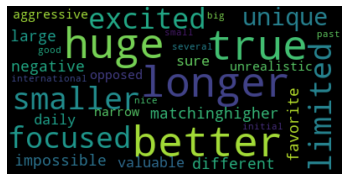

In [90]:
#WordCloud of Adjectives
word=" ".join(word for word in (df['adj'].values))
WC = WordCloud(max_font_size=50, max_words=30, background_color="Black").generate(word)
plt.imshow(WC, interpolation = 'bilinear') 
plt.axis('off')
plt.show()


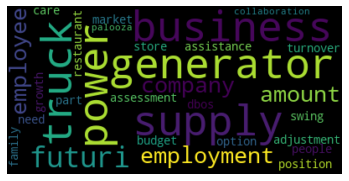

In [91]:
#WordCloud of Nouns
word=" ".join(word for word in (df['noun'].values))
WC = WordCloud(max_font_size=50, max_words=30, background_color="Black").generate(word)
plt.imshow(WC, interpolation = 'bilinear') 
plt.axis('off')
plt.show()


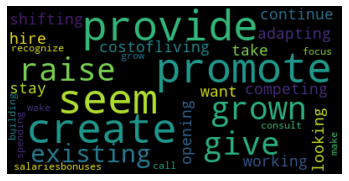

In [92]:
#WordCloud of Verbs
word=" ".join(word for word in (df['verb'].values))
WC = WordCloud(max_font_size=50, max_words=30, background_color="Black").generate(word)
plt.imshow(WC, interpolation = 'bilinear') 
plt.axis('off')
plt.show()


In [93]:
#Getting vectors for adjectives
adjs_words = list(set([word for sublist in [document.split() for document in adjs] for word in sublist]))

word_adjs_vectors = np.array([nlp(word).vector for word in adjs_words])
df_a = pd.DataFrame(word_adjs_vectors, index=adjs_words)
df_a

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
abstract,-0.416059,-0.035058,-0.706708,1.002169,-0.032686,-0.229294,-0.701577,-0.206715,-0.098210,-1.196778,...,-0.249098,-0.295849,-0.245615,1.161317,0.267240,0.186526,0.184053,0.792223,1.344801,0.069228
progessive,-0.807260,-0.663688,0.653211,1.609126,-0.396034,0.325206,-0.391708,0.393670,0.338285,0.448380,...,0.133647,-0.073102,-0.554254,-0.324897,0.298088,-0.372602,0.695800,-0.045542,1.816686,0.291731
monetary,-1.093396,0.797445,1.023386,0.729630,-0.132316,-0.957030,-0.104348,-0.392496,-0.176853,-0.547543,...,-0.668539,-0.721251,-0.523930,0.110523,1.020314,-0.590046,0.427123,0.501165,1.049958,0.016255
centshour,-0.815541,-0.036601,-0.272080,1.288494,-0.443928,0.118978,0.311800,1.001277,-0.271686,0.041299,...,0.047128,-0.762238,-1.372648,0.126258,1.063077,-0.901887,0.435460,-0.450720,2.340184,-0.094485
pompous,-1.200004,0.680675,0.520716,0.123879,-0.752352,0.067558,-0.439792,0.887955,0.177964,0.356721,...,-0.883332,-0.876367,-1.192224,0.152121,1.236554,-0.272625,1.489187,-0.552002,1.151386,-0.000181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
undertested,-1.467764,0.255815,1.203168,0.270629,-1.067711,-0.812409,-0.219115,-0.724214,0.166895,0.065051,...,-0.094191,-0.849402,-0.362830,0.636812,1.672610,0.221943,0.068532,0.640361,0.904602,0.671038
unattainable,-1.020643,-0.228856,0.302923,0.178315,-0.929106,0.385603,-0.381768,0.595646,-0.063849,0.265760,...,-0.791952,-1.311413,-0.738621,0.679587,2.134906,0.568278,1.189347,0.457626,2.030267,-0.354695
dressno,0.232516,-1.297335,-0.598487,-0.047127,-0.698804,-0.739047,-1.169566,0.456349,-0.975452,-0.341009,...,-0.211207,-0.534233,-0.159607,-0.529726,0.316221,0.405075,-1.110216,-0.583830,0.380872,1.402524
chanin,-0.409917,-1.109153,-0.087333,0.214271,0.783214,-0.227814,-0.851857,0.682747,-0.729705,0.009343,...,0.282655,0.292806,-0.770000,0.144690,-0.726043,-1.070871,-0.717807,0.840100,0.769119,0.651793


In [94]:
#Resetting the index
df_a.reset_index(level=0, inplace=True)
df_a

,index,0,1,2,3,4,5,6,7,8,...,86,87,88,89,90,91,92,93,94,95
0,abstract,-0.416059,-0.035058,-0.706708,1.002169,-0.032686,-0.229294,-0.701577,-0.206715,-0.098210,...,-0.249098,-0.295849,-0.245615,1.161317,0.267240,0.186526,0.184053,0.792223,1.344801,0.069228
1,progessive,-0.807260,-0.663688,0.653211,1.609126,-0.396034,0.325206,-0.391708,0.393670,0.338285,...,0.133647,-0.073102,-0.554254,-0.324897,0.298088,-0.372602,0.695800,-0.045542,1.816686,0.291731
2,monetary,-1.093396,0.797445,1.023386,0.729630,-0.132316,-0.957030,-0.104348,-0.392496,-0.176853,...,-0.668539,-0.721251,-0.523930,0.110523,1.020314,-0.590046,0.427123,0.501165,1.049958,0.016255
3,centshour,-0.815541,-0.036601,-0.272080,1.288494,-0.443928,0.118978,0.311800,1.001277,-0.271686,...,0.047128,-0.762238,-1.372648,0.126258,1.063077,-0.901887,0.435460,-0.450720,2.340184,-0.094485
4,pompous,-1.200004,0.680675,0.520716,0.123879,-0.752352,0.067558,-0.439792,0.887955,0.177964,...,-0.883332,-0.876367,-1.192224,0.152121,1.236554,-0.272625,1.489187,-0.552002,1.151386,-0.000181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7452,undertested,-1.467764,0.255815,1.203168,0.270629,-1.067711,-0.812409,-0.219115,-0.724214,0.166895,...,-0.094191,-0.849402,-0.362830,0.636812,1.672610,0.221943,0.068532,0.640361,0.904602,0.671038
7453,unattainable,-1.020643,-0.228856,0.302923,0.178315,-0.929106,0.385603,-0.381768,0.595646,-0.063849,...,-0.791952,-1.311413,-0.738621,0.679587,2.134906,0.568278,1.189347,0.457626,2.030267,-0.354695
7454,dressno,0.232516,-1.297335,-0.598487,-0.047127,-0.698804,-0.739047,-1.169566,0.456349,-0.975452,...,-0.211207,-0.534233,-0.159607,-0.529726,0.316221,0.405075,-1.110216,-0.583830,0.380872,1.402524
7455,chanin,-0.409917,-1.109153,-0.087333,0.214271,0.783214,-0.227814,-0.851857,0.682747,-0.729705,...,0.282655,0.292806,-0.770000,0.144690,-0.726043,-1.070871,-0.717807,0.840100,0.769119,0.651793


In [95]:
#Renaming the index 
df_a.rename({'index': 'Adjectives'}, axis=1, inplace=True)
df_a

,Adjectives,0,1,2,3,4,5,6,7,8,...,86,87,88,89,90,91,92,93,94,95
0,abstract,-0.416059,-0.035058,-0.706708,1.002169,-0.032686,-0.229294,-0.701577,-0.206715,-0.098210,...,-0.249098,-0.295849,-0.245615,1.161317,0.267240,0.186526,0.184053,0.792223,1.344801,0.069228
1,progessive,-0.807260,-0.663688,0.653211,1.609126,-0.396034,0.325206,-0.391708,0.393670,0.338285,...,0.133647,-0.073102,-0.554254,-0.324897,0.298088,-0.372602,0.695800,-0.045542,1.816686,0.291731
2,monetary,-1.093396,0.797445,1.023386,0.729630,-0.132316,-0.957030,-0.104348,-0.392496,-0.176853,...,-0.668539,-0.721251,-0.523930,0.110523,1.020314,-0.590046,0.427123,0.501165,1.049958,0.016255
3,centshour,-0.815541,-0.036601,-0.272080,1.288494,-0.443928,0.118978,0.311800,1.001277,-0.271686,...,0.047128,-0.762238,-1.372648,0.126258,1.063077,-0.901887,0.435460,-0.450720,2.340184,-0.094485
4,pompous,-1.200004,0.680675,0.520716,0.123879,-0.752352,0.067558,-0.439792,0.887955,0.177964,...,-0.883332,-0.876367,-1.192224,0.152121,1.236554,-0.272625,1.489187,-0.552002,1.151386,-0.000181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7452,undertested,-1.467764,0.255815,1.203168,0.270629,-1.067711,-0.812409,-0.219115,-0.724214,0.166895,...,-0.094191,-0.849402,-0.362830,0.636812,1.672610,0.221943,0.068532,0.640361,0.904602,0.671038
7453,unattainable,-1.020643,-0.228856,0.302923,0.178315,-0.929106,0.385603,-0.381768,0.595646,-0.063849,...,-0.791952,-1.311413,-0.738621,0.679587,2.134906,0.568278,1.189347,0.457626,2.030267,-0.354695
7454,dressno,0.232516,-1.297335,-0.598487,-0.047127,-0.698804,-0.739047,-1.169566,0.456349,-0.975452,...,-0.211207,-0.534233,-0.159607,-0.529726,0.316221,0.405075,-1.110216,-0.583830,0.380872,1.402524
7455,chanin,-0.409917,-1.109153,-0.087333,0.214271,0.783214,-0.227814,-0.851857,0.682747,-0.729705,...,0.282655,0.292806,-0.770000,0.144690,-0.726043,-1.070871,-0.717807,0.840100,0.769119,0.651793


In [96]:
#Getting vectors for nouns
nouns_words = list(set([word for sublist in [document.split() for document in nouns] for word in sublist]))

word_nouns_vectors = np.array([nlp(word).vector for word in nouns_words])
df_n = pd.DataFrame(word_nouns_vectors, index=nouns_words)
df_n

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
gear,-0.852083,-0.672338,0.179027,0.895121,0.664613,0.238715,-0.275603,0.813164,-0.122302,0.516418,...,-0.035182,0.538901,-1.011828,0.149035,-1.581536,-0.404018,-0.934914,0.102658,1.623481,-0.406789
claim,-0.317705,0.106646,0.545570,0.381521,0.090030,0.457393,0.451590,0.857127,-0.231495,0.145546,...,0.811881,-0.306930,-0.196692,0.663982,-1.676716,-0.930061,-0.794602,0.232828,1.217351,0.326925
friction,-0.773682,0.192703,0.592446,0.130308,0.355288,-0.266342,-0.483158,-0.155704,-0.637575,0.049002,...,-0.425740,0.778768,-1.235811,0.524598,-1.491531,-0.507044,-1.319168,-0.365769,1.814276,0.463017
mlcu,-0.461232,-0.963469,0.533443,0.665782,0.150452,-0.215029,-0.578903,0.280866,-0.565320,-0.163446,...,0.081093,0.325371,-0.356839,-0.917071,0.313362,-0.737073,-0.581843,0.255381,0.424273,1.047986
moveups,-0.580672,-1.043017,1.268000,0.241449,-0.757900,-0.068467,-1.142300,0.909864,-0.323553,0.069088,...,0.655342,0.239178,0.199178,0.271286,2.096436,-0.291109,0.166675,-0.867986,-0.402835,0.858125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tog,0.106300,-1.791664,-1.062568,0.726048,-0.354260,1.132728,-0.056734,-1.006597,-0.088148,-0.549816,...,0.537239,0.007072,-0.526997,0.174109,-0.901324,-1.394987,-0.161320,-0.078788,0.383733,0.041660
3mos,-0.490844,-0.672120,0.584034,0.553825,-0.256845,-0.489543,-1.335755,0.706992,-1.022813,-0.219052,...,0.345268,0.217443,0.161009,-0.148049,0.250314,-0.433230,0.081067,-0.411137,1.036885,0.595310
productscapabilities,-1.130232,-0.202784,0.349469,0.537058,-0.485468,-0.192605,-0.461231,0.837107,-0.448001,0.369344,...,1.227754,-0.041475,0.428056,0.162799,0.447347,-0.078151,-0.182713,-0.294751,-0.516314,0.690702
productssales,-1.433421,-0.671174,0.196165,0.414947,-0.962874,0.043872,-0.597667,0.373914,-0.473481,0.135373,...,0.765711,0.215447,-0.147719,0.357682,0.531805,0.028877,0.158160,-0.388938,-0.032637,0.742176


In [97]:
#Resetting the index
df_n.reset_index(level=0, inplace=True)
df_n

,index,0,1,2,3,4,5,6,7,8,...,86,87,88,89,90,91,92,93,94,95
0,gear,-0.852083,-0.672338,0.179027,0.895121,0.664613,0.238715,-0.275603,0.813164,-0.122302,...,-0.035182,0.538901,-1.011828,0.149035,-1.581536,-0.404018,-0.934914,0.102658,1.623481,-0.406789
1,claim,-0.317705,0.106646,0.545570,0.381521,0.090030,0.457393,0.451590,0.857127,-0.231495,...,0.811881,-0.306930,-0.196692,0.663982,-1.676716,-0.930061,-0.794602,0.232828,1.217351,0.326925
2,friction,-0.773682,0.192703,0.592446,0.130308,0.355288,-0.266342,-0.483158,-0.155704,-0.637575,...,-0.425740,0.778768,-1.235811,0.524598,-1.491531,-0.507044,-1.319168,-0.365769,1.814276,0.463017
3,mlcu,-0.461232,-0.963469,0.533443,0.665782,0.150452,-0.215029,-0.578903,0.280866,-0.565320,...,0.081093,0.325371,-0.356839,-0.917071,0.313362,-0.737073,-0.581843,0.255381,0.424273,1.047986
4,moveups,-0.580672,-1.043017,1.268000,0.241449,-0.757900,-0.068467,-1.142300,0.909864,-0.323553,...,0.655342,0.239178,0.199178,0.271286,2.096436,-0.291109,0.166675,-0.867986,-0.402835,0.858125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16766,tog,0.106300,-1.791664,-1.062568,0.726048,-0.354260,1.132728,-0.056734,-1.006597,-0.088148,...,0.537239,0.007072,-0.526997,0.174109,-0.901324,-1.394987,-0.161320,-0.078788,0.383733,0.041660
16767,3mos,-0.490844,-0.672120,0.584034,0.553825,-0.256845,-0.489543,-1.335755,0.706992,-1.022813,...,0.345268,0.217443,0.161009,-0.148049,0.250314,-0.433230,0.081067,-0.411137,1.036885,0.595310
16768,productscapabilities,-1.130232,-0.202784,0.349469,0.537058,-0.485468,-0.192605,-0.461231,0.837107,-0.448001,...,1.227754,-0.041475,0.428056,0.162799,0.447347,-0.078151,-0.182713,-0.294751,-0.516314,0.690702
16769,productssales,-1.433421,-0.671174,0.196165,0.414947,-0.962874,0.043872,-0.597667,0.373914,-0.473481,...,0.765711,0.215447,-0.147719,0.357682,0.531805,0.028877,0.158160,-0.388938,-0.032637,0.742176


In [98]:
#Renaming the index 
df_n.rename({'index': 'Nouns'}, axis=1, inplace=True)
df_n

,Nouns,0,1,2,3,4,5,6,7,8,...,86,87,88,89,90,91,92,93,94,95
0,gear,-0.852083,-0.672338,0.179027,0.895121,0.664613,0.238715,-0.275603,0.813164,-0.122302,...,-0.035182,0.538901,-1.011828,0.149035,-1.581536,-0.404018,-0.934914,0.102658,1.623481,-0.406789
1,claim,-0.317705,0.106646,0.545570,0.381521,0.090030,0.457393,0.451590,0.857127,-0.231495,...,0.811881,-0.306930,-0.196692,0.663982,-1.676716,-0.930061,-0.794602,0.232828,1.217351,0.326925
2,friction,-0.773682,0.192703,0.592446,0.130308,0.355288,-0.266342,-0.483158,-0.155704,-0.637575,...,-0.425740,0.778768,-1.235811,0.524598,-1.491531,-0.507044,-1.319168,-0.365769,1.814276,0.463017
3,mlcu,-0.461232,-0.963469,0.533443,0.665782,0.150452,-0.215029,-0.578903,0.280866,-0.565320,...,0.081093,0.325371,-0.356839,-0.917071,0.313362,-0.737073,-0.581843,0.255381,0.424273,1.047986
4,moveups,-0.580672,-1.043017,1.268000,0.241449,-0.757900,-0.068467,-1.142300,0.909864,-0.323553,...,0.655342,0.239178,0.199178,0.271286,2.096436,-0.291109,0.166675,-0.867986,-0.402835,0.858125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16766,tog,0.106300,-1.791664,-1.062568,0.726048,-0.354260,1.132728,-0.056734,-1.006597,-0.088148,...,0.537239,0.007072,-0.526997,0.174109,-0.901324,-1.394987,-0.161320,-0.078788,0.383733,0.041660
16767,3mos,-0.490844,-0.672120,0.584034,0.553825,-0.256845,-0.489543,-1.335755,0.706992,-1.022813,...,0.345268,0.217443,0.161009,-0.148049,0.250314,-0.433230,0.081067,-0.411137,1.036885,0.595310
16768,productscapabilities,-1.130232,-0.202784,0.349469,0.537058,-0.485468,-0.192605,-0.461231,0.837107,-0.448001,...,1.227754,-0.041475,0.428056,0.162799,0.447347,-0.078151,-0.182713,-0.294751,-0.516314,0.690702
16769,productssales,-1.433421,-0.671174,0.196165,0.414947,-0.962874,0.043872,-0.597667,0.373914,-0.473481,...,0.765711,0.215447,-0.147719,0.357682,0.531805,0.028877,0.158160,-0.388938,-0.032637,0.742176


In [99]:
#Getting vectors for verbs
verbs_words = list(set([word for sublist in [document.split() for document in verbs] for word in sublist]))

word_verbs_vectors = np.array([nlp(word).vector for word in verbs_words])
df_v = pd.DataFrame(word_verbs_vectors, index=verbs_words)
df_v

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
dentist,-0.568503,-0.635509,0.026712,0.281446,-0.344382,-0.339479,-0.324545,1.042164,-0.561406,-0.552975,...,0.673825,-0.376499,0.165387,-0.439807,-1.442613,-1.252407,-0.128082,0.445031,0.870316,0.192003
storebeing,-1.350459,-0.005565,-0.700134,1.368500,0.868091,-0.102854,0.257307,-0.121783,0.215988,-0.071139,...,-0.533151,-0.367666,-0.427481,-0.754176,-0.966289,-0.421577,-0.389238,0.264286,2.567031,-0.033327
weaning,-1.505858,-0.500521,-0.258734,1.777696,0.165505,-0.599154,-0.025544,0.120501,0.061245,-0.329266,...,-0.379045,-0.797178,-0.545051,1.019799,0.061871,-0.375228,-0.458340,0.543393,2.047978,-0.597918
corralling,-1.576578,-0.469424,-0.848632,2.320861,-0.195469,-0.889706,0.856717,0.660999,0.046264,-0.421846,...,-0.222493,-0.992005,-0.961672,1.502558,0.087236,-0.330187,-0.258873,0.578427,1.903908,-0.464542
tryingexperimenting,-1.055054,-0.722076,-0.881427,2.429028,0.811689,-1.202598,0.304192,0.473054,-0.029610,-0.688872,...,-0.696027,-0.305946,-0.054004,0.980317,0.572961,-0.276519,-0.679065,0.319990,1.856770,-0.211152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sullied,-0.075039,-0.247869,0.875213,0.317773,-0.365352,-0.496213,-0.392659,-0.077355,-0.346873,-0.654479,...,0.609228,-0.534457,-0.163688,2.865515,0.228393,1.124325,-1.277066,-0.408775,0.373891,-0.074699
lock,-0.625432,0.308008,-0.253030,0.431801,-0.109316,-0.214322,0.766593,0.754643,-0.595914,0.627789,...,1.108093,-0.841621,-0.877713,0.543901,-1.398755,-0.589593,-0.017381,0.541335,0.800484,-0.173708
eventsactivitiescafeteriagift,-0.633208,-0.370861,-0.222062,1.145509,1.374130,-0.731704,0.032775,0.517735,-0.054675,-0.059900,...,1.432385,0.509453,-0.467179,0.802928,-1.120800,-0.715877,-0.225660,0.940163,0.774591,0.623973
millimans,-0.923346,-0.630721,0.443905,0.404284,-0.825747,-0.377124,-0.833739,0.498050,-1.074460,0.105207,...,2.088007,-0.308676,0.301052,1.077844,1.001463,0.033146,-0.040276,-0.634881,-0.488639,0.406442


In [100]:
#Resetting the index
df_v.reset_index(level=0, inplace=True)
df_v

,index,0,1,2,3,4,5,6,7,8,...,86,87,88,89,90,91,92,93,94,95
0,dentist,-0.568503,-0.635509,0.026712,0.281446,-0.344382,-0.339479,-0.324545,1.042164,-0.561406,...,0.673825,-0.376499,0.165387,-0.439807,-1.442613,-1.252407,-0.128082,0.445031,0.870316,0.192003
1,storebeing,-1.350459,-0.005565,-0.700134,1.368500,0.868091,-0.102854,0.257307,-0.121783,0.215988,...,-0.533151,-0.367666,-0.427481,-0.754176,-0.966289,-0.421577,-0.389238,0.264286,2.567031,-0.033327
2,weaning,-1.505858,-0.500521,-0.258734,1.777696,0.165505,-0.599154,-0.025544,0.120501,0.061245,...,-0.379045,-0.797178,-0.545051,1.019799,0.061871,-0.375228,-0.458340,0.543393,2.047978,-0.597918
3,corralling,-1.576578,-0.469424,-0.848632,2.320861,-0.195469,-0.889706,0.856717,0.660999,0.046264,...,-0.222493,-0.992005,-0.961672,1.502558,0.087236,-0.330187,-0.258873,0.578427,1.903908,-0.464542
4,tryingexperimenting,-1.055054,-0.722076,-0.881427,2.429028,0.811689,-1.202598,0.304192,0.473054,-0.029610,...,-0.696027,-0.305946,-0.054004,0.980317,0.572961,-0.276519,-0.679065,0.319990,1.856770,-0.211152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9112,sullied,-0.075039,-0.247869,0.875213,0.317773,-0.365352,-0.496213,-0.392659,-0.077355,-0.346873,...,0.609228,-0.534457,-0.163688,2.865515,0.228393,1.124325,-1.277066,-0.408775,0.373891,-0.074699
9113,lock,-0.625432,0.308008,-0.253030,0.431801,-0.109316,-0.214322,0.766593,0.754643,-0.595914,...,1.108093,-0.841621,-0.877713,0.543901,-1.398755,-0.589593,-0.017381,0.541335,0.800484,-0.173708
9114,eventsactivitiescafeteriagift,-0.633208,-0.370861,-0.222062,1.145509,1.374130,-0.731704,0.032775,0.517735,-0.054675,...,1.432385,0.509453,-0.467179,0.802928,-1.120800,-0.715877,-0.225660,0.940163,0.774591,0.623973
9115,millimans,-0.923346,-0.630721,0.443905,0.404284,-0.825747,-0.377124,-0.833739,0.498050,-1.074460,...,2.088007,-0.308676,0.301052,1.077844,1.001463,0.033146,-0.040276,-0.634881,-0.488639,0.406442


In [101]:
#Renaming the index 
df_v.rename({'index': 'Verbs'}, axis=1, inplace=True)
df_v

,Verbs,0,1,2,3,4,5,6,7,8,...,86,87,88,89,90,91,92,93,94,95
0,dentist,-0.568503,-0.635509,0.026712,0.281446,-0.344382,-0.339479,-0.324545,1.042164,-0.561406,...,0.673825,-0.376499,0.165387,-0.439807,-1.442613,-1.252407,-0.128082,0.445031,0.870316,0.192003
1,storebeing,-1.350459,-0.005565,-0.700134,1.368500,0.868091,-0.102854,0.257307,-0.121783,0.215988,...,-0.533151,-0.367666,-0.427481,-0.754176,-0.966289,-0.421577,-0.389238,0.264286,2.567031,-0.033327
2,weaning,-1.505858,-0.500521,-0.258734,1.777696,0.165505,-0.599154,-0.025544,0.120501,0.061245,...,-0.379045,-0.797178,-0.545051,1.019799,0.061871,-0.375228,-0.458340,0.543393,2.047978,-0.597918
3,corralling,-1.576578,-0.469424,-0.848632,2.320861,-0.195469,-0.889706,0.856717,0.660999,0.046264,...,-0.222493,-0.992005,-0.961672,1.502558,0.087236,-0.330187,-0.258873,0.578427,1.903908,-0.464542
4,tryingexperimenting,-1.055054,-0.722076,-0.881427,2.429028,0.811689,-1.202598,0.304192,0.473054,-0.029610,...,-0.696027,-0.305946,-0.054004,0.980317,0.572961,-0.276519,-0.679065,0.319990,1.856770,-0.211152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9112,sullied,-0.075039,-0.247869,0.875213,0.317773,-0.365352,-0.496213,-0.392659,-0.077355,-0.346873,...,0.609228,-0.534457,-0.163688,2.865515,0.228393,1.124325,-1.277066,-0.408775,0.373891,-0.074699
9113,lock,-0.625432,0.308008,-0.253030,0.431801,-0.109316,-0.214322,0.766593,0.754643,-0.595914,...,1.108093,-0.841621,-0.877713,0.543901,-1.398755,-0.589593,-0.017381,0.541335,0.800484,-0.173708
9114,eventsactivitiescafeteriagift,-0.633208,-0.370861,-0.222062,1.145509,1.374130,-0.731704,0.032775,0.517735,-0.054675,...,1.432385,0.509453,-0.467179,0.802928,-1.120800,-0.715877,-0.225660,0.940163,0.774591,0.623973
9115,millimans,-0.923346,-0.630721,0.443905,0.404284,-0.825747,-0.377124,-0.833739,0.498050,-1.074460,...,2.088007,-0.308676,0.301052,1.077844,1.001463,0.033146,-0.040276,-0.634881,-0.488639,0.406442


In [102]:
#Getting vectors for adverbs
adverbs_words = list(set([word for sublist in [document.split() for document in adverbs] for word in sublist]))

word_adverbs_vectors = np.array([nlp(word).vector for word in adverbs_words])
df_ad = pd.DataFrame(word_adverbs_vectors, index=adverbs_words)
df_ad

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
promptly,-0.787541,-0.695085,0.125288,0.759349,0.877036,-0.053601,-0.530808,0.353475,0.326105,-0.356077,...,-1.307822,-0.222359,-0.091781,-0.159559,0.414513,-0.006355,-0.696115,0.901619,1.069442,-0.089172
closenessfamily,-0.571579,-0.946311,0.130048,0.652144,-0.270368,-0.759408,-0.684475,0.134354,-0.002710,-0.588612,...,0.035260,-0.608392,-0.424562,-0.410101,1.065270,0.485952,-1.318033,-0.172581,1.347561,0.359396
primarily,-0.341580,-0.948636,0.103577,0.601441,0.543288,-0.894692,-0.516189,-0.035868,-0.106895,-0.418362,...,-0.579988,0.198371,0.170649,0.006677,0.283066,-0.153169,-0.488146,-0.082998,1.191783,0.789688
molly,-0.149475,-1.345694,-0.487687,0.532962,-0.337974,0.043290,-0.534557,0.154672,-0.306515,-1.188631,...,-0.361532,-0.748141,-0.605840,-1.162521,0.136968,0.791861,-1.766015,0.319745,1.182219,0.861045
tenuously,-0.881584,-1.562468,-0.173016,0.623108,0.334308,-1.007446,-0.450635,-0.195717,-0.304933,-0.231797,...,-0.844684,0.099915,-0.655920,0.439277,0.015099,0.091240,-1.002919,0.201220,0.870976,0.480682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
deliberately,-0.236155,-0.353126,0.503596,1.236895,0.075977,-0.489784,-1.030124,0.377829,0.108421,-0.645295,...,-0.656762,0.172832,0.100348,-0.840132,1.056635,0.456778,-1.575584,0.128243,0.895833,0.426324
compassionately,0.148258,-0.958747,0.104010,0.233373,0.095242,-0.509536,-0.270128,-0.191087,-0.934889,-0.187428,...,-1.228641,-0.168428,-0.327050,-0.591972,0.035053,0.565830,-1.054704,0.117649,1.567279,0.590703
inaccurately,0.129853,-0.956408,0.393775,0.825154,-0.628080,-0.557107,-0.568339,0.557302,-0.943706,-0.941163,...,-0.801606,-0.478084,0.370697,-1.434692,0.319917,0.806097,-1.234538,-0.348095,1.410151,0.334980
negatively,-0.381558,-1.399101,0.102158,0.300681,-0.054182,-0.472629,-0.120821,0.271891,0.000081,-1.199229,...,-0.121097,-0.178687,-0.320056,-0.602758,0.402246,1.074514,-1.018709,-0.455644,0.885479,0.285503


In [103]:
#Resetting the index
df_ad.reset_index(level=0, inplace=True)
df_ad

,index,0,1,2,3,4,5,6,7,8,...,86,87,88,89,90,91,92,93,94,95
0,promptly,-0.787541,-0.695085,0.125288,0.759349,0.877036,-0.053601,-0.530808,0.353475,0.326105,...,-1.307822,-0.222359,-0.091781,-0.159559,0.414513,-0.006355,-0.696115,0.901619,1.069442,-0.089172
1,closenessfamily,-0.571579,-0.946311,0.130048,0.652144,-0.270368,-0.759408,-0.684475,0.134354,-0.002710,...,0.035260,-0.608392,-0.424562,-0.410101,1.065270,0.485952,-1.318033,-0.172581,1.347561,0.359396
2,primarily,-0.341580,-0.948636,0.103577,0.601441,0.543288,-0.894692,-0.516189,-0.035868,-0.106895,...,-0.579988,0.198371,0.170649,0.006677,0.283066,-0.153169,-0.488146,-0.082998,1.191783,0.789688
3,molly,-0.149475,-1.345694,-0.487687,0.532962,-0.337974,0.043290,-0.534557,0.154672,-0.306515,...,-0.361532,-0.748141,-0.605840,-1.162521,0.136968,0.791861,-1.766015,0.319745,1.182219,0.861045
4,tenuously,-0.881584,-1.562468,-0.173016,0.623108,0.334308,-1.007446,-0.450635,-0.195717,-0.304933,...,-0.844684,0.099915,-0.655920,0.439277,0.015099,0.091240,-1.002919,0.201220,0.870976,0.480682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,deliberately,-0.236155,-0.353126,0.503596,1.236895,0.075977,-0.489784,-1.030124,0.377829,0.108421,...,-0.656762,0.172832,0.100348,-0.840132,1.056635,0.456778,-1.575584,0.128243,0.895833,0.426324
1138,compassionately,0.148258,-0.958747,0.104010,0.233373,0.095242,-0.509536,-0.270128,-0.191087,-0.934889,...,-1.228641,-0.168428,-0.327050,-0.591972,0.035053,0.565830,-1.054704,0.117649,1.567279,0.590703
1139,inaccurately,0.129853,-0.956408,0.393775,0.825154,-0.628080,-0.557107,-0.568339,0.557302,-0.943706,...,-0.801606,-0.478084,0.370697,-1.434692,0.319917,0.806097,-1.234538,-0.348095,1.410151,0.334980
1140,negatively,-0.381558,-1.399101,0.102158,0.300681,-0.054182,-0.472629,-0.120821,0.271891,0.000081,...,-0.121097,-0.178687,-0.320056,-0.602758,0.402246,1.074514,-1.018709,-0.455644,0.885479,0.285503


In [104]:
#Renaming the index 
df_ad.rename({'index': 'Adverbs'}, axis=1, inplace=True)
df_ad  

,Adverbs,0,1,2,3,4,5,6,7,8,...,86,87,88,89,90,91,92,93,94,95
0,promptly,-0.787541,-0.695085,0.125288,0.759349,0.877036,-0.053601,-0.530808,0.353475,0.326105,...,-1.307822,-0.222359,-0.091781,-0.159559,0.414513,-0.006355,-0.696115,0.901619,1.069442,-0.089172
1,closenessfamily,-0.571579,-0.946311,0.130048,0.652144,-0.270368,-0.759408,-0.684475,0.134354,-0.002710,...,0.035260,-0.608392,-0.424562,-0.410101,1.065270,0.485952,-1.318033,-0.172581,1.347561,0.359396
2,primarily,-0.341580,-0.948636,0.103577,0.601441,0.543288,-0.894692,-0.516189,-0.035868,-0.106895,...,-0.579988,0.198371,0.170649,0.006677,0.283066,-0.153169,-0.488146,-0.082998,1.191783,0.789688
3,molly,-0.149475,-1.345694,-0.487687,0.532962,-0.337974,0.043290,-0.534557,0.154672,-0.306515,...,-0.361532,-0.748141,-0.605840,-1.162521,0.136968,0.791861,-1.766015,0.319745,1.182219,0.861045
4,tenuously,-0.881584,-1.562468,-0.173016,0.623108,0.334308,-1.007446,-0.450635,-0.195717,-0.304933,...,-0.844684,0.099915,-0.655920,0.439277,0.015099,0.091240,-1.002919,0.201220,0.870976,0.480682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,deliberately,-0.236155,-0.353126,0.503596,1.236895,0.075977,-0.489784,-1.030124,0.377829,0.108421,...,-0.656762,0.172832,0.100348,-0.840132,1.056635,0.456778,-1.575584,0.128243,0.895833,0.426324
1138,compassionately,0.148258,-0.958747,0.104010,0.233373,0.095242,-0.509536,-0.270128,-0.191087,-0.934889,...,-1.228641,-0.168428,-0.327050,-0.591972,0.035053,0.565830,-1.054704,0.117649,1.567279,0.590703
1139,inaccurately,0.129853,-0.956408,0.393775,0.825154,-0.628080,-0.557107,-0.568339,0.557302,-0.943706,...,-0.801606,-0.478084,0.370697,-1.434692,0.319917,0.806097,-1.234538,-0.348095,1.410151,0.334980
1140,negatively,-0.381558,-1.399101,0.102158,0.300681,-0.054182,-0.472629,-0.120821,0.271891,0.000081,...,-0.121097,-0.178687,-0.320056,-0.602758,0.402246,1.074514,-1.018709,-0.455644,0.885479,0.285503


# KMeans Using Adjectives from Corpus

In [41]:
#Using Sklearn standarizing the data
sc_X = StandardScaler()
X_train = sc_X.fit_transform(df1.iloc[:, 1:])

In [42]:
#Using KMeans fitting standarized data
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
    print('\rProgress: %d' % i, end='')
    sys.stdout.flush()

Progress: 14

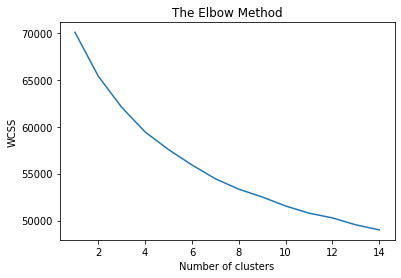

In [43]:
#KMeans Elbow plot
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

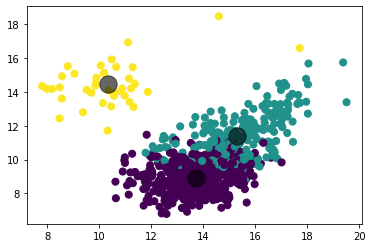

In [44]:
#Clustering plot
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_transform(X_train)
fitted=kmeans.fit(y_kmeans)
prediction=kmeans.predict(y_kmeans)
plt.scatter(y_kmeans[:, 0], y_kmeans[:, 1],c=prediction,s=50 , cmap='viridis')
centers2 = fitted.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1],c='black', s=300, alpha=0.6)


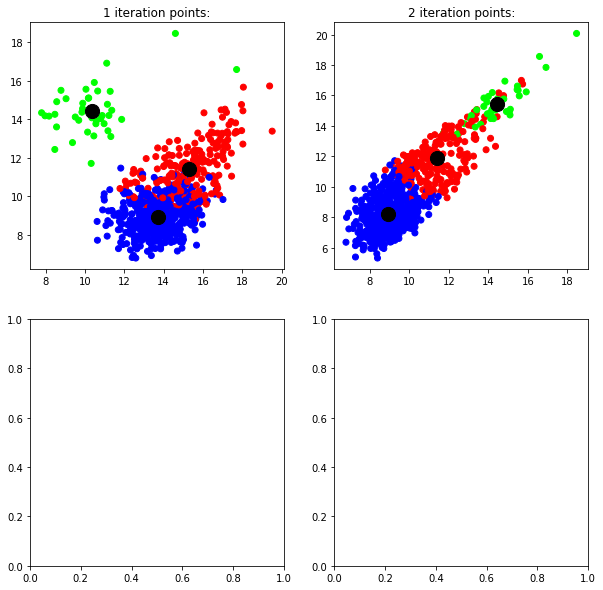

In [45]:
#Plotting clusterwise
kmeans = KMeans(n_clusters=3,random_state=0,max_iter=i+1)
kmeans.fit(y_kmeans)

fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(10,10))

from sklearn.cluster import KMeans
c=d=0
for i in range(0,2):
    
    ax[c,d].title.set_text(f"{i+1} iteration points:")

    centroids=kmeans.cluster_centers_
    #print(c)
    #print(d)
    #print(y_kmeans[:, i+1])
    
    ax[c,d].scatter(y_kmeans[: ,i],y_kmeans[: ,i+1],c=prediction,cmap='brg')
    
    ax[c,d].scatter(kmeans.cluster_centers_[:, i], kmeans.cluster_centers_[:, i+1], s=200, c='black')
    
    d+=1
    if d==2:
        c+=1
        d=0

In [46]:
#Defining labels and saving to csv file
df1['CLUSTERS'] = kmeans.labels_
df1.to_csv("cluster_adjectives_vector.csv",index=False)

In [47]:
df1

,Adjectives,0,1,2,3,4,5,6,7,8,...,87,88,89,90,91,92,93,94,95,CLUSTERS
0,transitional,-1.191627,-0.096339,0.268463,1.067400,-0.104154,-0.667713,-0.244266,-0.126073,0.354152,...,-0.041924,-0.250517,0.449590,1.057575,0.052906,0.611200,-0.499222,1.175307,-0.787830,0
1,scan,-0.610111,-0.708329,1.275022,0.426838,0.107882,-0.076758,-0.599254,1.502248,-0.304917,...,0.388807,-0.482751,-0.536895,-0.282772,-0.776279,0.389735,0.575097,-0.232227,0.663025,1
2,impossible,-1.120235,-0.220768,0.014776,0.402755,0.340912,-0.501197,-0.172089,0.690255,0.512134,...,-0.258522,-0.547388,0.293729,2.274259,-0.009794,0.698326,-0.005204,1.579491,-0.435734,0
3,unique,-1.023547,0.523175,0.937803,-0.202497,-0.750866,-0.182289,-0.200924,0.948607,0.206747,...,-0.311521,-0.509540,0.337455,1.405769,-0.207678,-0.020608,0.284159,0.959351,-0.215062,0
4,communicative,-1.441023,0.681586,0.645300,0.629125,-0.529227,-0.781978,0.204435,0.492617,0.365039,...,-0.523386,-0.441781,0.197085,0.933780,-0.011058,1.726489,0.382462,0.706260,-0.435092,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,trustworthy,-0.552425,-0.182589,0.197622,0.368517,0.104736,-0.242823,-0.304268,0.449983,-0.702685,...,-0.217689,-0.706086,-0.310624,0.796963,0.057799,0.056880,0.245437,1.780566,1.189645,1
726,volumedial,-1.261052,-0.100945,0.087671,0.981440,-1.084659,-0.250343,-0.049268,0.320345,0.519849,...,-0.916388,-0.617873,-0.313811,0.057993,-0.749011,1.067941,0.395726,0.985104,0.353304,0
727,comfortable,-0.845356,0.777846,0.103007,0.511190,-0.740618,-0.433949,-0.283085,0.647309,-0.163272,...,-1.095864,-0.886069,0.887900,1.990195,0.385675,1.415364,-0.409599,1.563556,-0.138204,0
728,elective,-0.993556,0.166301,0.352411,1.335307,-0.430864,-0.098745,-0.496027,-0.478282,0.292299,...,-0.320193,-0.546286,0.484697,0.872153,-0.193156,0.150209,0.055545,1.675304,0.090657,0


In [48]:
#segregating two columns ans sorting the clusters
dfs = df1[['Adjectives', 'CLUSTERS']].copy()
dfs.sort_values('CLUSTERS')

,Adjectives,CLUSTERS
0,transitional,0
450,small,0
448,medical,0
445,major,0
443,variable,0
...,...,...
379,largest,2
230,longer,2
369,closest,2
249,highest,2


In [49]:
#Saving segregated columns to csv
dfs.to_csv("cluster_adj_vector.csv",index=False)

CLUSTER no.0


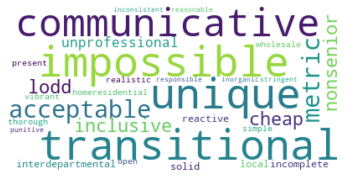

CLUSTER no.1


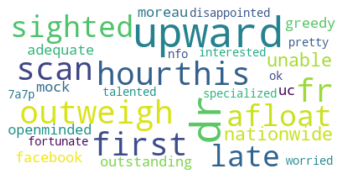

CLUSTER no.2


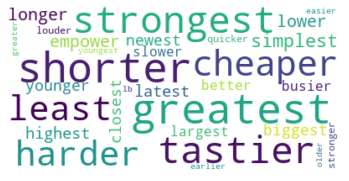

In [50]:
#Forming the clusters WordCloud
for i in range(0,3):
    word=" ".join(word for word in (dfs[dfs['CLUSTERS']==i].Adjectives.values))
    WC = WordCloud(max_font_size=50, max_words=30, background_color="White").generate(word)
    print('CLUSTER no.{}'.format(i))
    plt.imshow(WC, interpolation = 'bilinear') 
    plt.axis('off')
    plt.show()
    i+=1


# KMeans Using Noun from Corpus

In [51]:
#Using Sklearn standarizing the data
sc_X = StandardScaler()
X_train = sc_X.fit_transform(df2.iloc[:, 1:])

In [52]:
#Using KMeans fitting standarized data
wcss = []
for i in range(1, 17):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
    print('\rProgress: %d' % i, end='')
    sys.stdout.flush()

Progress: 16

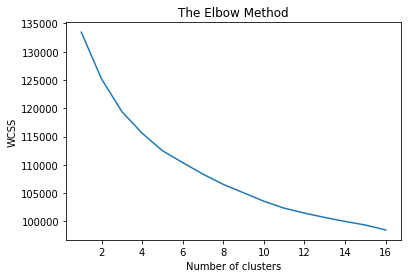

In [53]:
#KMeans plot
plt.plot(range(1, 17), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

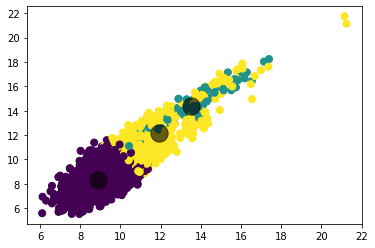

In [54]:
#Clustering plot
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_transform(X_train)
fitted=kmeans.fit(y_kmeans)
prediction=kmeans.predict(y_kmeans)
plt.scatter(y_kmeans[:, 0], y_kmeans[:, 1],c=prediction,s=50 , cmap='viridis')
centers2 = fitted.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1],c='black', s=300, alpha=0.6)


In [55]:
#Defining labels and saving to csv file
df2['CLUSTERS'] = kmeans.labels_
df2.to_csv("cluster_nouns_vector.csv",index=False)

In [56]:
df2

,Nouns,0,1,2,3,4,5,6,7,8,...,87,88,89,90,91,92,93,94,95,CLUSTERS
0,gear,-0.852083,-0.672338,0.179027,0.895121,0.664613,0.238715,-0.275603,0.813164,-0.122302,...,0.538901,-1.011828,0.149035,-1.581536,-0.404018,-0.934914,0.102658,1.623481,-0.406789,0
1,claim,-0.317705,0.106646,0.545570,0.381521,0.090030,0.457393,0.451590,0.857127,-0.231495,...,-0.306930,-0.196692,0.663982,-1.676716,-0.930061,-0.794602,0.232828,1.217351,0.326925,0
2,era,-0.265005,-0.247099,0.352210,-0.668797,0.271529,0.669287,-0.699086,0.366453,0.281160,...,0.512062,-1.539045,-0.167432,-0.506022,-0.432602,-0.911521,0.416113,1.211912,-0.072659,2
3,forecast,-0.716312,-0.444409,1.236617,-0.314472,0.652007,0.244191,-0.793902,0.840435,-0.284307,...,-0.357367,-0.626259,-0.506847,-1.362795,-0.713158,-1.494211,0.607106,0.938288,-0.005054,2
4,tmobile,0.407497,-0.243888,-0.030143,0.490425,0.295151,-0.460714,-0.088589,0.632120,-0.706055,...,-0.652587,-0.990404,0.250919,-1.288145,-0.634501,-0.743437,-0.539408,1.023029,1.186394,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1385,reinvent,-0.532768,-0.257406,0.228590,0.397596,0.824770,0.084183,-0.741599,1.080239,-0.196911,...,0.359597,0.234465,-0.312887,-1.789947,-0.616463,-0.148096,1.352131,0.868931,0.514345,0
1386,bpm,-0.421092,-1.260067,0.544979,0.789883,-0.538355,-0.610880,0.410009,1.568571,-1.129817,...,-0.934645,-0.466051,-0.106119,-0.364718,-0.761986,-0.237726,0.418838,0.289383,0.658910,2
1387,attitude,-0.109649,-0.263645,0.478554,0.204902,0.118714,0.653623,-0.396535,0.969327,0.032319,...,-0.107446,-1.349264,0.031555,-0.728725,-0.024502,-1.074200,0.159268,0.859931,0.472780,0
1388,complaint,-0.854789,0.016987,0.336428,0.467096,0.424540,-0.232473,0.203097,1.166816,-0.507190,...,0.761228,-0.820927,-0.843458,-0.870116,-0.304572,-1.041904,0.849149,0.979698,0.156356,0


In [57]:
#segregating two columns ans sorting the clusters
dfs2 = df2[['Nouns', 'CLUSTERS']].copy()
dfs2.sort_values('CLUSTERS')

,Nouns,CLUSTERS
0,gear,0
819,timeit,0
820,collector,0
821,casualty,0
822,response,0
...,...,...
1058,objective,2
463,cfo,2
462,day,2
1073,map,2


In [58]:
#Saving segregated columns to csv
dfs2.to_csv("cluster_nouns_vector.csv",index=False)

CLUSTER no.0


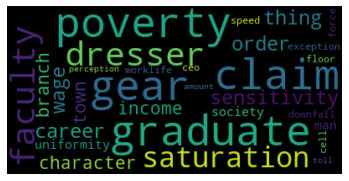

CLUSTER no.1


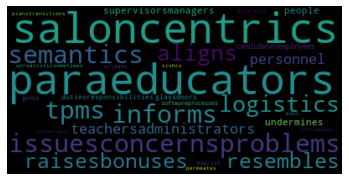

CLUSTER no.2


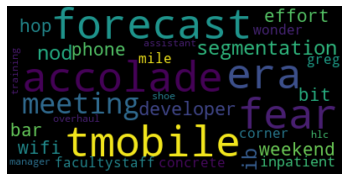

In [59]:
#Forming the clusters WordCloud
for i in range(0,3):
    word=" ".join(word for word in (dfs2[dfs2['CLUSTERS']==i].Nouns.values))
    WC = WordCloud(max_font_size=50, max_words=30, background_color="Black").generate(word)
    print('CLUSTER no.{}'.format(i))
    plt.imshow(WC, interpolation = 'bilinear') 
    plt.axis('off')
    plt.show()
    i+=1


# KMeans Using Verb from Corpus

In [60]:
#Using Sklearn fitting the data
sc_X = StandardScaler()
X_train = sc_X.fit_transform(df3.iloc[:, 1:])

In [61]:
#Using KMeans fitting standarized data
wcss = []
for i in range(1, 19):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
    print('\rProgress: %d' % i, end='')
    sys.stdout.flush()

Progress: 18

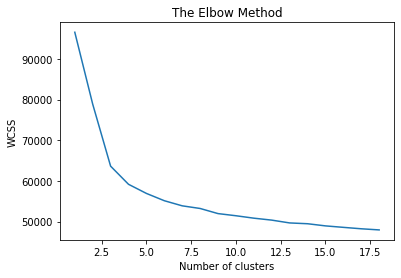

In [62]:
#KMeans plot
plt.plot(range(1, 19), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

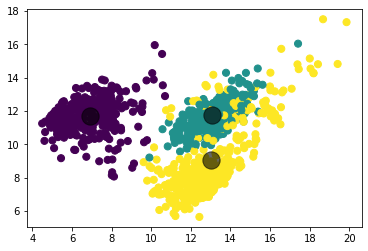

In [63]:
#Clustering plot
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_transform(X_train)
fitted=kmeans.fit(y_kmeans)
prediction=kmeans.predict(y_kmeans)
plt.scatter(y_kmeans[:, 0], y_kmeans[:, 1],c=prediction,s=50 , cmap='viridis')
centers2 = fitted.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1],c='black', s=300, alpha=0.6)


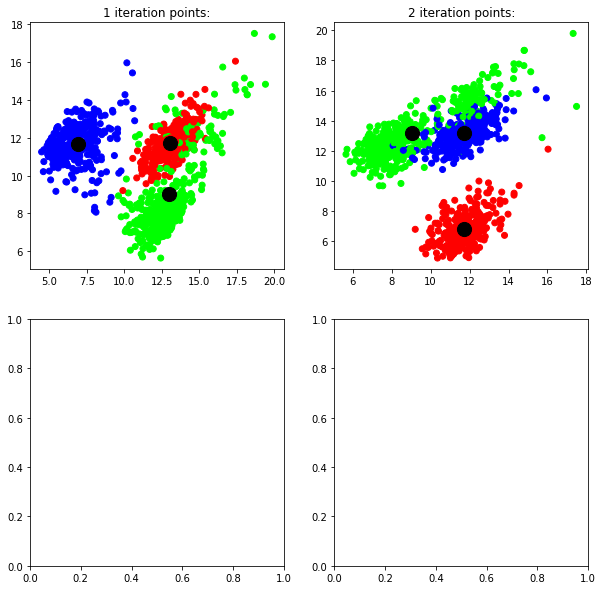

In [64]:
#Plotting Clusterwise
kmeans = KMeans(n_clusters=3,random_state=0,max_iter=i+1)
kmeans.fit(y_kmeans)

fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(10,10))

from sklearn.cluster import KMeans
c=d=0
for i in range(0,2):
    
    ax[c,d].title.set_text(f"{i+1} iteration points:")

    centroids=kmeans.cluster_centers_
    #print(c)
    #print(d)
    #print(y_kmeans[:, i+1])
    
    ax[c,d].scatter(y_kmeans[: ,i],y_kmeans[: ,i+1],c=prediction,cmap='brg')
    
    ax[c,d].scatter(kmeans.cluster_centers_[:, i], kmeans.cluster_centers_[:, i+1], s=200, c='black')
    
    d+=1
    if d==2:
        c+=1
        d=0

In [65]:
#Defining labels and saving to csv file
df3['CLUSTERS'] = kmeans.labels_
df3.to_csv("cluster_verb_vector.csv",index=False)

In [66]:
df3

,Verbs,0,1,2,3,4,5,6,7,8,...,87,88,89,90,91,92,93,94,95,CLUSTERS
0,focus,-0.663509,-0.217897,0.802128,0.665642,0.173577,0.177560,0.133054,0.799104,-0.343226,...,-0.117667,-0.451730,0.935593,-0.867922,-0.237105,-0.303366,0.605184,0.439697,0.083930,2
1,waiting,-1.387239,-0.853075,-0.394118,2.995854,0.762923,-0.791926,0.484906,1.201562,0.152828,...,0.585796,-0.676596,1.247655,0.126354,0.055320,-0.598859,0.275887,1.325695,-0.192288,0
2,causing,-1.215268,-0.739146,-0.675250,2.701484,0.287436,-0.122452,0.276894,1.286035,-0.215808,...,0.160967,0.047570,1.458286,-0.446426,0.040981,-1.355399,-0.089054,0.898685,0.074573,0
3,managing,-0.998869,-0.648688,-0.670504,2.101493,0.455474,-0.731716,1.091236,1.059065,-0.595687,...,-0.965875,-0.522616,1.025634,-0.532051,-0.006633,-0.227883,0.534165,1.602209,-0.431532,0
4,fails,-0.757565,0.400379,-0.047666,0.653475,-0.575672,-0.665432,-0.536631,1.184796,-1.071438,...,0.543119,0.386721,1.912105,0.750796,0.410304,0.184460,-0.372184,0.189137,0.568604,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,show,0.067615,-1.035421,0.217289,0.102582,0.147910,0.052588,0.435722,1.232272,0.000080,...,0.528860,-0.799968,0.416811,-0.257075,-1.154062,-0.964414,-0.231470,1.023700,0.153221,2
1002,fixing,-1.266040,-0.404995,-0.368159,2.592010,0.379167,-0.395698,0.307449,0.755307,-0.319104,...,-0.268132,-0.818605,1.818761,-0.108574,0.254463,-1.427985,-0.071120,1.157124,0.002952,0
1003,written,-0.744287,-0.075966,0.809738,0.058784,-0.063466,-0.323218,-0.754509,0.232223,-0.203482,...,-0.375673,-0.436027,2.147851,0.259371,0.885387,-1.601683,0.695766,0.379479,0.825354,1
1004,execute,-0.767900,0.013998,-0.145192,0.712245,0.229452,-0.347589,0.693836,0.621994,0.059438,...,0.508203,-0.727095,1.352479,-1.261876,-0.890415,-0.727577,0.459963,1.405158,0.084336,2


In [67]:
#segregating two columns ans sorting the clusters
dfs3 = df3[['Verbs', 'CLUSTERS']].copy()
dfs3.sort_values('CLUSTERS')

,Verbs,CLUSTERS
716,drawing,0
525,introducing,0
263,sitting,0
528,heading,0
260,complaining,0
...,...,...
494,teach,2
498,',2
500,reach,2
715,whilejust,2


In [68]:
#Saving segregated columns to csv
dfs3.to_csv("cluster_verb_vector.csv",index=False)

CLUSTER no.0


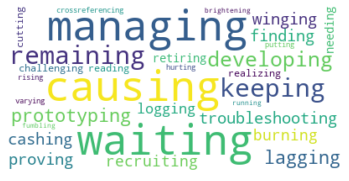

CLUSTER no.1


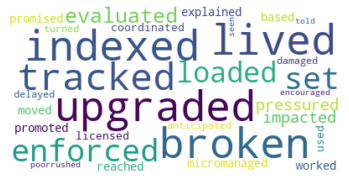

CLUSTER no.2


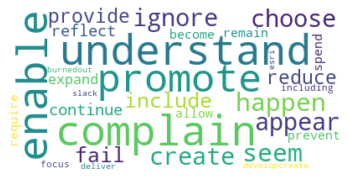

In [69]:
#Forming the clusters WordCloud
for i in range(0,3):
    word=" ".join(word for word in (dfs3[dfs3['CLUSTERS']==i].Verbs.values))
    WC = WordCloud(max_font_size=50, max_words=30, background_color="White").generate(word)
    print('CLUSTER no.{}'.format(i))
    plt.imshow(WC, interpolation = 'bilinear') 
    plt.axis('off')
    plt.show()
    i+=1


# KMeans Using Adverb from corpus

In [70]:
#Using Sklearn fitting the data
sc_X = StandardScaler()
X_train = sc_X.fit_transform(df4.iloc[:, 1:])

In [71]:
#Using KMeans fitting standarized data
wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
    print('\rProgress: %d' % i, end='')
    sys.stdout.flush()

Progress: 20

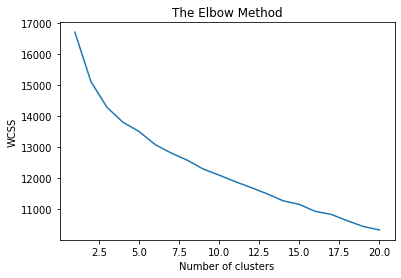

In [72]:
#KMeans plot
plt.plot(range(1, 21), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

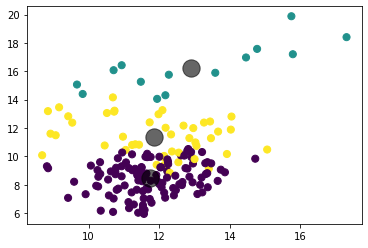

In [73]:
#Clustering plot
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_transform(X_train)
fitted=kmeans.fit(y_kmeans)
prediction=kmeans.predict(y_kmeans)
plt.scatter(y_kmeans[:, 0], y_kmeans[:, 1],c=prediction,s=50 , cmap='viridis')
centers2 = fitted.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1],c='black', s=300, alpha=0.6)

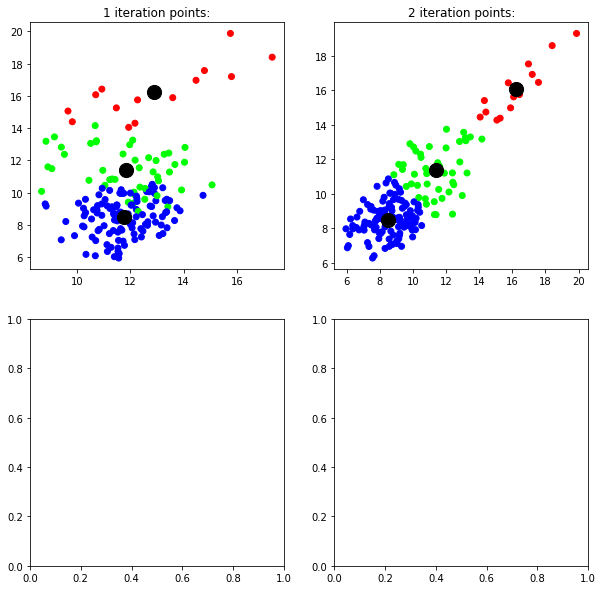

In [74]:
#Plotting Clusterwise
kmeans = KMeans(n_clusters=3,random_state=0,max_iter=i+1)
kmeans.fit(y_kmeans)

fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(10,10))

from sklearn.cluster import KMeans
c=d=0
for i in range(0,2):
    
    ax[c,d].title.set_text(f"{i+1} iteration points:")

    centroids=kmeans.cluster_centers_
    #print(c)
    #print(d)
    #print(y_kmeans[:, i+1])
    
    ax[c,d].scatter(y_kmeans[: ,i],y_kmeans[: ,i+1],c=prediction,cmap='brg')
    
    ax[c,d].scatter(kmeans.cluster_centers_[:, i], kmeans.cluster_centers_[:, i+1], s=200, c='black')
    
    d+=1
    if d==2:
        c+=1
        d=0

In [75]:
#Defining labels and saving to csv file
df4['CLUSTERS'] = kmeans.labels_
df4.to_csv("cluster_adverb_vector.csv",index=False)

In [76]:
df4

,Adverbs,0,1,2,3,4,5,6,7,8,...,87,88,89,90,91,92,93,94,95,CLUSTERS
0,blatantly,0.253264,-0.557297,0.064702,-0.486079,0.201927,-0.691392,-0.215621,-0.738653,-0.418276,...,0.061355,0.054764,-0.591344,-0.251989,1.018108,-0.708190,-0.216621,1.566167,1.202509,0
1,selectively,0.316382,-0.688075,2.065651,0.042072,-0.600811,0.385369,-0.430755,0.509239,0.029799,...,-0.617638,-0.714584,-0.770813,0.808344,0.559265,-0.485519,0.080977,1.525191,-0.162093,0
2,financially,-0.334889,-0.712790,0.297335,0.287182,-0.268799,-0.480612,-0.828167,0.369469,0.239342,...,-0.189193,0.223676,-0.660361,1.278810,0.506292,-1.282180,0.617328,1.315952,0.310962,2
3,additionally,0.482912,-0.747415,-0.198652,-0.194407,0.220358,-0.424144,-0.622010,0.090964,-0.458406,...,-0.511335,0.044694,-1.057407,0.889292,0.320010,-1.784251,0.666393,0.880633,0.844069,2
4,constantly,0.237167,-0.813756,-0.134478,-0.039856,0.158055,-0.408625,-0.563024,0.353326,-0.402879,...,-0.185418,0.081157,-0.259847,0.152029,0.095111,-0.757057,-0.316720,1.519983,0.126492,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,authentically,-0.243979,-0.561095,0.209761,-0.064083,0.221430,-0.698623,-0.652026,0.060699,-0.593176,...,-0.192655,-0.063908,-0.431236,0.913585,1.418913,-1.033755,-0.719318,1.015449,1.764186,2
170,os,-0.520579,-0.505384,0.079900,-0.497754,0.718983,0.100070,0.586847,0.310246,-0.916430,...,-0.239610,-0.830767,-0.826816,-0.177024,0.140145,0.204301,-0.355282,1.073735,1.046980,1
171,quickly,-0.672797,-0.868640,0.732031,0.431146,0.516423,-0.247316,-0.111060,0.173404,0.055664,...,-1.015950,-0.493661,-0.312262,0.161859,0.668818,-0.839583,-0.350511,1.098703,0.149339,2
172,negatively,-0.381558,-1.399101,0.102158,0.300681,-0.054182,-0.472629,-0.120821,0.271891,0.000081,...,-0.178687,-0.320056,-0.602758,0.402246,1.074514,-1.018709,-0.455644,0.885479,0.285503,2


In [77]:
#segregating two columns ans sorting the clusters
dfs4 = df4[['Adverbs', 'CLUSTERS']].copy()
dfs4.sort_values('CLUSTERS')

,Adverbs,CLUSTERS
0,blatantly,0
68,fairly,0
67,desperately,0
66,anymore,0
30,poorly,0
...,...,...
77,strategically,2
78,locally,2
79,deeply,2
72,hardly,2


In [78]:
#Saving segregated columns to csv
dfs4.to_csv("cluster_adverb_vector.csv",index=False)

CLUSTER no.0


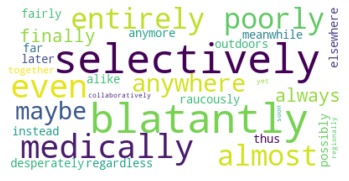

CLUSTER no.1


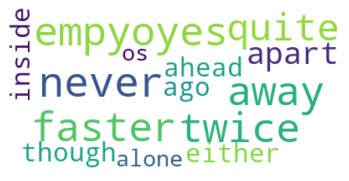

CLUSTER no.2


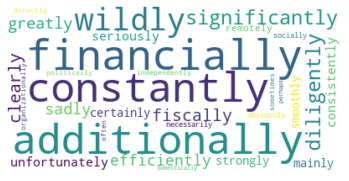

In [79]:
#Forming the clusters WordCloud
for i in range(0,3):
    word=" ".join(word for word in (dfs4[dfs4['CLUSTERS']==i].Adverbs.values))
    WC = WordCloud(max_font_size=50, max_words=30, background_color="White").generate(word)
    print('CLUSTER no.{}'.format(i))
    plt.imshow(WC, interpolation = 'bilinear') 
    plt.axis('off')
    plt.show()
    i+=1


# KMeans Using Adjectives from unique_words

In [105]:
#Using Sklearn standardizing the data
sc_X = StandardScaler()
X_train = sc_X.fit_transform(df_a.iloc[:, 1:])

In [106]:
#Using KMeans fitting standarized data
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
    print('\rProgress: %d' % i, end='')
    sys.stdout.flush()

Progress: 14

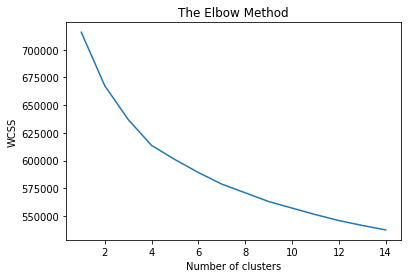

In [107]:
#KMeans Elbow Plot
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

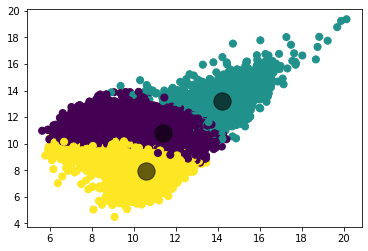

In [108]:
#Clustering plot
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_transform(X_train)
fitted=kmeans.fit(y_kmeans)
prediction=kmeans.predict(y_kmeans)
plt.scatter(y_kmeans[:, 0], y_kmeans[:, 1],c=prediction,s=50 , cmap='viridis')
centers2 = fitted.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1],c='black', s=300, alpha=0.6)

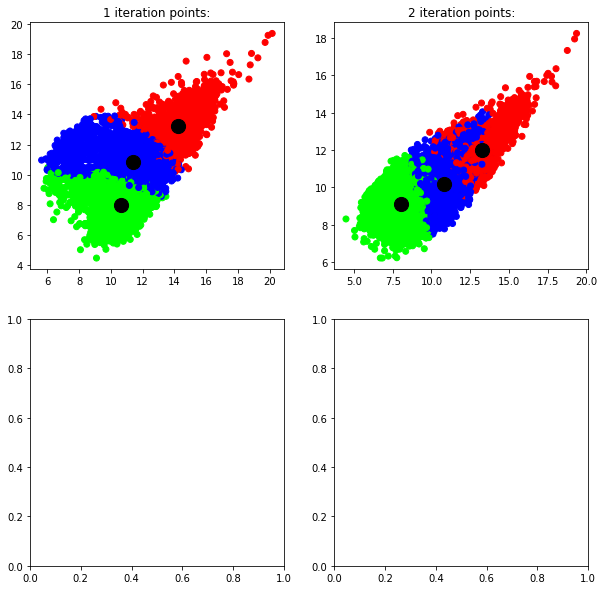

In [109]:
#Plotting Clusterwise
kmeans = KMeans(n_clusters=3,random_state=0,max_iter=i+1)
kmeans.fit(y_kmeans)

fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(10,10))

from sklearn.cluster import KMeans
c=d=0
for i in range(0,2):
    
    ax[c,d].title.set_text(f"{i+1} iteration points:")

    centroids=kmeans.cluster_centers_
    #print(c)
    #print(d)
    #print(y_kmeans[:, i+1])
    
    ax[c,d].scatter(y_kmeans[: ,i],y_kmeans[: ,i+1],c=prediction,cmap='brg')
    
    ax[c,d].scatter(kmeans.cluster_centers_[:, i], kmeans.cluster_centers_[:, i+1], s=200, c='black')
    
    d+=1
    if d==2:
        c+=1
        d=0

In [110]:
#Defining labels and saving to csv file
df_a['CLUSTERS'] = kmeans.labels_
df_a.to_csv("cluster_uadj_vector.csv",index=False)

In [111]:
#segregating two columns ans sorting the clusters
dfs = df_a[['Adjectives', 'CLUSTERS']].copy()
dfs.sort_values('CLUSTERS')

,Adjectives,CLUSTERS
3728,wellmeaningbutpieinthesky,0
4003,intensive,0
4004,cranky,0
4005,hospitable,0
4009,miraculous,0
...,...,...
1311,bamboohr,2
4496,mergesell,2
1308,preschool,2
4478,stableviable,2


In [112]:
#Saving segregated columns to csv
dfs.to_csv("cluster_uadj_vector.csv",index=False)

CLUSTER no.0


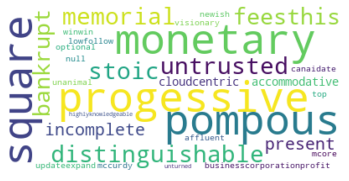

CLUSTER no.1


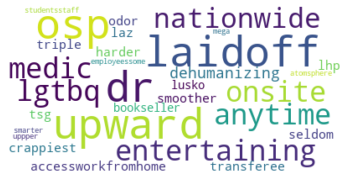

CLUSTER no.2


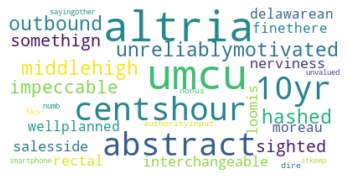

In [113]:
#Forming the clusters WordCloud
for i in range(0,3):
    word=" ".join(word for word in (dfs[dfs['CLUSTERS']==i].Adjectives.values))
    WC = WordCloud(max_font_size=50, max_words=30, background_color="White").generate(word)
    print('CLUSTER no.{}'.format(i))
    plt.imshow(WC, interpolation = 'bilinear') 
    plt.axis('off')
    plt.show()
    i+=1


# KMeans Using Noun from unique_words

In [114]:
#Using Sklearn standarizing the data
sc_X = StandardScaler()
X_train = sc_X.fit_transform(df_n.iloc[:, 1:])

In [115]:
#Using KMeans fitting standarized data
wcss = []
for i in range(1, 17):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
    print('\rProgress: %d' % i, end='')
    sys.stdout.flush()

Progress: 16

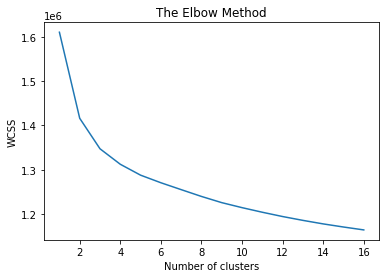

In [116]:
#KMeans Elbow Plot
plt.plot(range(1, 17), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

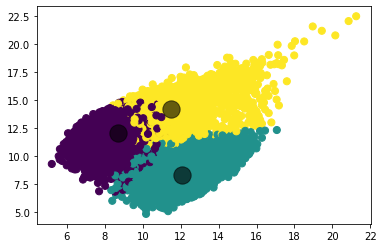

In [117]:
#Clustering Plot
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_transform(X_train)
fitted=kmeans.fit(y_kmeans)
prediction=kmeans.predict(y_kmeans)
plt.scatter(y_kmeans[:, 0], y_kmeans[:, 1],c=prediction,s=50 , cmap='viridis')
centers2 = fitted.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1],c='black', s=300, alpha=0.6)


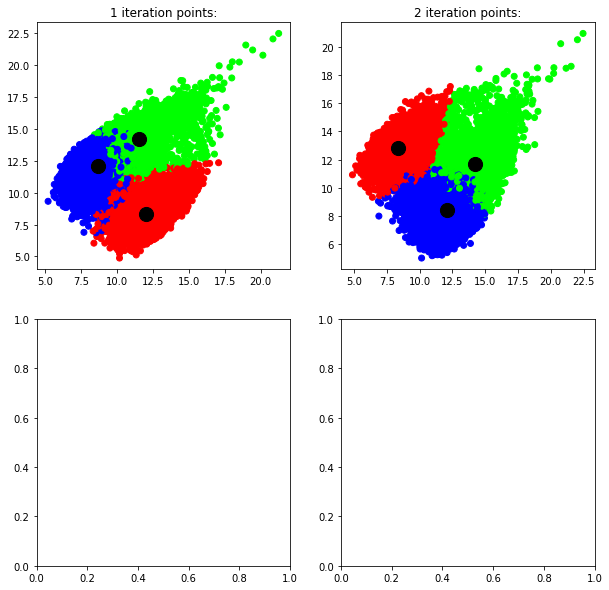

In [118]:
#Plotting Clusterwise
kmeans = KMeans(n_clusters=3,random_state=0,max_iter=i+1)
kmeans.fit(y_kmeans)

fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(10,10))

from sklearn.cluster import KMeans
c=d=0
for i in range(0,2):
    
    ax[c,d].title.set_text(f"{i+1} iteration points:")

    centroids=kmeans.cluster_centers_
    #print(c)
    #print(d)
    #print(y_kmeans[:, i+1])
    
    ax[c,d].scatter(y_kmeans[: ,i],y_kmeans[: ,i+1],c=prediction,cmap='brg')
    
    ax[c,d].scatter(kmeans.cluster_centers_[:, i], kmeans.cluster_centers_[:, i+1], s=200, c='black')
    
    d+=1
    if d==2:
        c+=1
        d=0

In [119]:
#Defining labels and saving to csv file
df_n['CLUSTERS'] = kmeans.labels_
df_n.to_csv("cluster_unouns_vector.csv",index=False)

In [120]:
df_n

,Nouns,0,1,2,3,4,5,6,7,8,...,87,88,89,90,91,92,93,94,95,CLUSTERS
0,gear,-0.852083,-0.672338,0.179027,0.895121,0.664613,0.238715,-0.275603,0.813164,-0.122302,...,0.538901,-1.011828,0.149035,-1.581536,-0.404018,-0.934914,0.102658,1.623481,-0.406789,1
1,claim,-0.317705,0.106646,0.545570,0.381521,0.090030,0.457393,0.451590,0.857127,-0.231495,...,-0.306930,-0.196692,0.663982,-1.676716,-0.930061,-0.794602,0.232828,1.217351,0.326925,1
2,friction,-0.773682,0.192703,0.592446,0.130308,0.355288,-0.266342,-0.483158,-0.155704,-0.637575,...,0.778768,-1.235811,0.524598,-1.491531,-0.507044,-1.319168,-0.365769,1.814276,0.463017,1
3,mlcu,-0.461232,-0.963469,0.533443,0.665782,0.150452,-0.215029,-0.578903,0.280866,-0.565320,...,0.325371,-0.356839,-0.917071,0.313362,-0.737073,-0.581843,0.255381,0.424273,1.047986,2
4,moveups,-0.580672,-1.043017,1.268000,0.241449,-0.757900,-0.068467,-1.142300,0.909864,-0.323553,...,0.239178,0.199178,0.271286,2.096436,-0.291109,0.166675,-0.867986,-0.402835,0.858125,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16766,tog,0.106300,-1.791664,-1.062568,0.726048,-0.354260,1.132728,-0.056734,-1.006597,-0.088148,...,0.007072,-0.526997,0.174109,-0.901324,-1.394987,-0.161320,-0.078788,0.383733,0.041660,2
16767,3mos,-0.490844,-0.672120,0.584034,0.553825,-0.256845,-0.489543,-1.335755,0.706992,-1.022813,...,0.217443,0.161009,-0.148049,0.250314,-0.433230,0.081067,-0.411137,1.036885,0.595310,2
16768,productscapabilities,-1.130232,-0.202784,0.349469,0.537058,-0.485468,-0.192605,-0.461231,0.837107,-0.448001,...,-0.041475,0.428056,0.162799,0.447347,-0.078151,-0.182713,-0.294751,-0.516314,0.690702,0
16769,productssales,-1.433421,-0.671174,0.196165,0.414947,-0.962874,0.043872,-0.597667,0.373914,-0.473481,...,0.215447,-0.147719,0.357682,0.531805,0.028877,0.158160,-0.388938,-0.032637,0.742176,0


In [121]:
#segregating two columns ans sorting the clusters
dfs2 = df_n[['Nouns', 'CLUSTERS']].copy()
dfs2.sort_values('CLUSTERS')

,Nouns,CLUSTERS
8385,visitsunits,0
7324,eforts,0
7316,jims,0
7308,oras,0
7304,thepeople,0
...,...,...
7467,drt,2
12042,aronson,2
9981,billet,2
4500,fastlarge,2


In [122]:
#Saving segregated columns to csv
dfs2.to_csv("cluster_unouns_vector.csv",index=False)

CLUSTER no.0


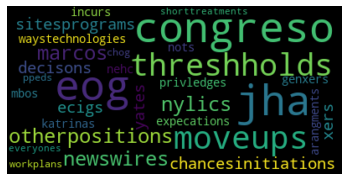

CLUSTER no.1


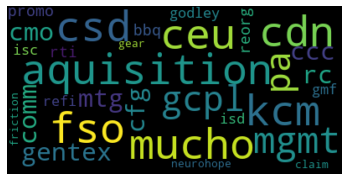

CLUSTER no.2


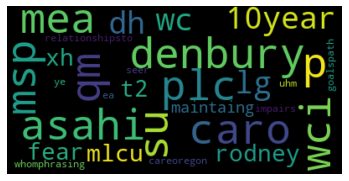

In [123]:
#Forming the clusters WordCloud
for i in range(0,3):
    word=" ".join(word for word in (dfs2[dfs2['CLUSTERS']==i].Nouns.values))
    WC = WordCloud(max_font_size=50, max_words=30, background_color="Black").generate(word)
    print('CLUSTER no.{}'.format(i))
    plt.imshow(WC, interpolation = 'bilinear') 
    plt.axis('off')
    plt.show()
    i+=1


# KMeans Using Verb from unique_words

In [124]:
#Using Sklearn standarizing the data
sc_X = StandardScaler()
X_train = sc_X.fit_transform(df_v.iloc[:, 1:])

In [125]:
#Using KMeans fitting standarized data
wcss = []
for i in range(1, 19):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
    print('\rProgress: %d' % i, end='')
    sys.stdout.flush()

Progress: 18

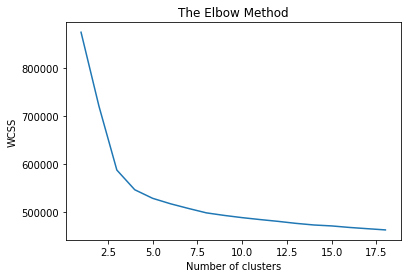

In [126]:
#KMeans Elbow Plot
plt.plot(range(1, 19), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

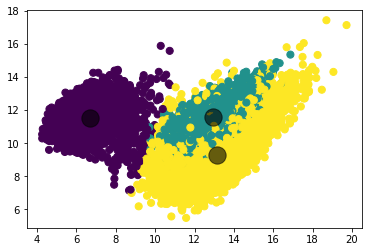

In [127]:
#Clustering Plot
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_transform(X_train)
fitted=kmeans.fit(y_kmeans)
prediction=kmeans.predict(y_kmeans)
plt.scatter(y_kmeans[:, 0], y_kmeans[:, 1],c=prediction,s=50 , cmap='viridis')
centers2 = fitted.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1],c='black', s=300, alpha=0.6)


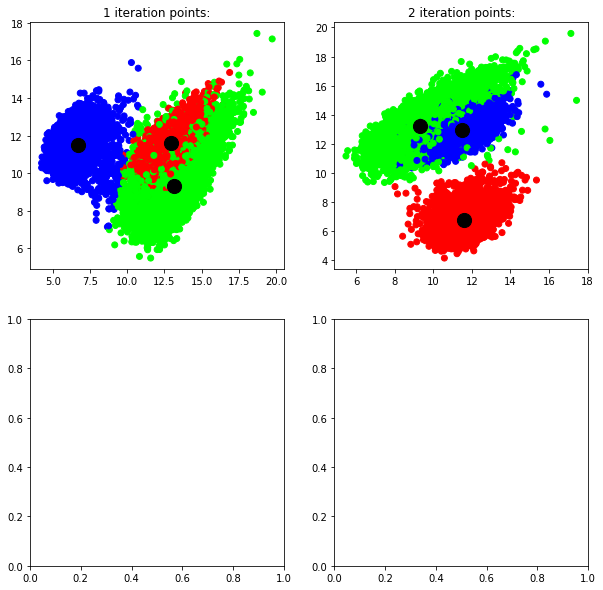

In [128]:
#Plotting Clusterwise
kmeans = KMeans(n_clusters=3,random_state=0,max_iter=i+1)
kmeans.fit(y_kmeans)

fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(10,10))

from sklearn.cluster import KMeans
c=d=0
for i in range(0,2):
    
    ax[c,d].title.set_text(f"{i+1} iteration points:")

    centroids=kmeans.cluster_centers_
    #print(c)
    #print(d)
    #print(y_kmeans[:, i+1])
    
    ax[c,d].scatter(y_kmeans[: ,i],y_kmeans[: ,i+1],c=prediction,cmap='brg')
    
    ax[c,d].scatter(kmeans.cluster_centers_[:, i], kmeans.cluster_centers_[:, i+1], s=200, c='black')
    
    d+=1
    if d==2:
        c+=1
        d=0

In [129]:
#Defining labels and saving to csv file
df_v['CLUSTERS'] = kmeans.labels_
df_v.to_csv("cluster_verb_vector.csv",index=False)

In [130]:
df_v

,Verbs,0,1,2,3,4,5,6,7,8,...,87,88,89,90,91,92,93,94,95,CLUSTERS
0,dentist,-0.568503,-0.635509,0.026712,0.281446,-0.344382,-0.339479,-0.324545,1.042164,-0.561406,...,-0.376499,0.165387,-0.439807,-1.442613,-1.252407,-0.128082,0.445031,0.870316,0.192003,0
1,storebeing,-1.350459,-0.005565,-0.700134,1.368500,0.868091,-0.102854,0.257307,-0.121783,0.215988,...,-0.367666,-0.427481,-0.754176,-0.966289,-0.421577,-0.389238,0.264286,2.567031,-0.033327,1
2,weaning,-1.505858,-0.500521,-0.258734,1.777696,0.165505,-0.599154,-0.025544,0.120501,0.061245,...,-0.797178,-0.545051,1.019799,0.061871,-0.375228,-0.458340,0.543393,2.047978,-0.597918,1
3,corralling,-1.576578,-0.469424,-0.848632,2.320861,-0.195469,-0.889706,0.856717,0.660999,0.046264,...,-0.992005,-0.961672,1.502558,0.087236,-0.330187,-0.258873,0.578427,1.903908,-0.464542,1
4,tryingexperimenting,-1.055054,-0.722076,-0.881427,2.429028,0.811689,-1.202598,0.304192,0.473054,-0.029610,...,-0.305946,-0.054004,0.980317,0.572961,-0.276519,-0.679065,0.319990,1.856770,-0.211152,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9112,sullied,-0.075039,-0.247869,0.875213,0.317773,-0.365352,-0.496213,-0.392659,-0.077355,-0.346873,...,-0.534457,-0.163688,2.865515,0.228393,1.124325,-1.277066,-0.408775,0.373891,-0.074699,2
9113,lock,-0.625432,0.308008,-0.253030,0.431801,-0.109316,-0.214322,0.766593,0.754643,-0.595914,...,-0.841621,-0.877713,0.543901,-1.398755,-0.589593,-0.017381,0.541335,0.800484,-0.173708,0
9114,eventsactivitiescafeteriagift,-0.633208,-0.370861,-0.222062,1.145509,1.374130,-0.731704,0.032775,0.517735,-0.054675,...,0.509453,-0.467179,0.802928,-1.120800,-0.715877,-0.225660,0.940163,0.774591,0.623973,0
9115,millimans,-0.923346,-0.630721,0.443905,0.404284,-0.825747,-0.377124,-0.833739,0.498050,-1.074460,...,-0.308676,0.301052,1.077844,1.001463,0.033146,-0.040276,-0.634881,-0.488639,0.406442,0


In [131]:
#segregating two columns ans sorting the clusters
dfs3 = df_v[['Verbs', 'CLUSTERS']].copy()
dfs3.sort_values('CLUSTERS')

,Verbs,CLUSTERS
0,dentist,0
6612,offline,0
3131,duplicate,0
6611,subobtimizes,0
3134,andceo,0
...,...,...
2952,relegated,2
2951,recipientfocused,2
6748,transitioned,2
2950,overlyprogrammed,2


In [132]:
#Saving segregated columns to csv
dfs3.to_csv("cluster_uverb_vector.csv",index=False)

CLUSTER no.0


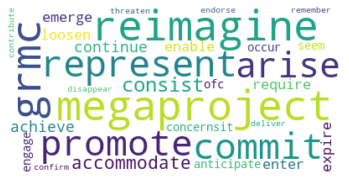

CLUSTER no.1


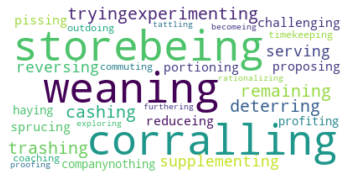

CLUSTER no.2


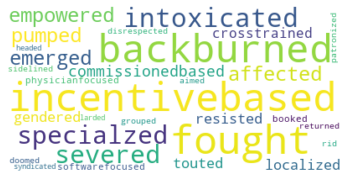

In [133]:
#Forming the clusters WordCloud
for i in range(0,3):
    word=" ".join(word for word in (dfs3[dfs3['CLUSTERS']==i].Verbs.values))
    WC = WordCloud(max_font_size=50, max_words=30, background_color="White").generate(word)
    print('CLUSTER no.{}'.format(i))
    plt.imshow(WC, interpolation = 'bilinear') 
    plt.axis('off')
    plt.show()
    i+=1


# KMeans Using Adverb from unique_words

In [134]:
#Using Sklearn standarizing the data
sc_X = StandardScaler()
X_train = sc_X.fit_transform(df_ad.iloc[:, 1:])

In [135]:
#Using KMeans fitting standarized data
wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
    print('\rProgress: %d' % i, end='')
    sys.stdout.flush()

Progress: 20

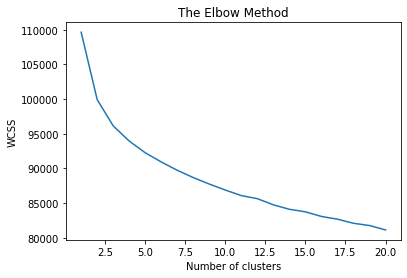

In [136]:
#KMeans Elbow Plot
plt.plot(range(1, 21), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

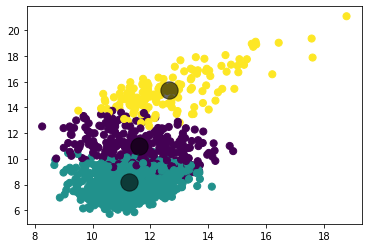

In [137]:
#Clustering Plot
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_transform(X_train)
fitted=kmeans.fit(y_kmeans)
prediction=kmeans.predict(y_kmeans)
plt.scatter(y_kmeans[:, 0], y_kmeans[:, 1],c=prediction,s=50 , cmap='viridis')
centers2 = fitted.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1],c='black', s=300, alpha=0.6)

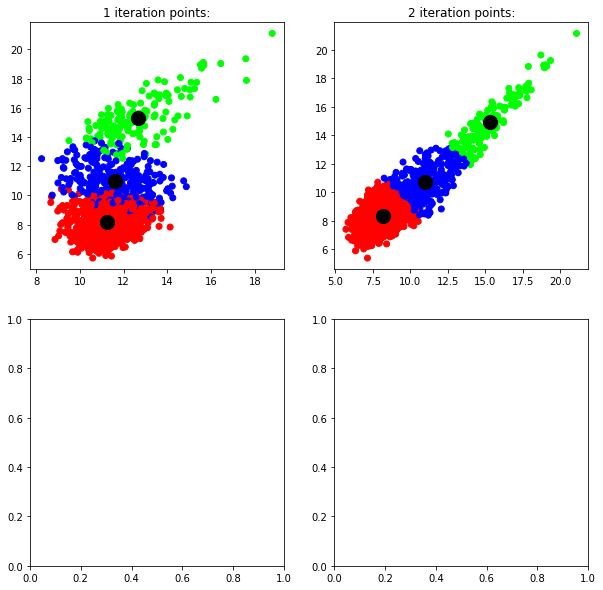

In [138]:
#Plotting Clusterwise
kmeans = KMeans(n_clusters=3,random_state=0,max_iter=i+1)
kmeans.fit(y_kmeans)

fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(10,10))

from sklearn.cluster import KMeans
c=d=0
for i in range(0,2):
    
    ax[c,d].title.set_text(f"{i+1} iteration points:")

    centroids=kmeans.cluster_centers_
    #print(c)
    #print(d)
    #print(y_kmeans[:, i+1])
    
    ax[c,d].scatter(y_kmeans[: ,i],y_kmeans[: ,i+1],c=prediction,cmap='brg')
    
    ax[c,d].scatter(kmeans.cluster_centers_[:, i], kmeans.cluster_centers_[:, i+1], s=200, c='black')
    
    d+=1
    if d==2:
        c+=1
        d=0

In [139]:
#Defining labels and saving to csv file
df_ad['CLUSTERS'] = kmeans.labels_
df_ad.to_csv("cluster_uadverb_vector.csv",index=False)

In [140]:
df_ad

,Adverbs,0,1,2,3,4,5,6,7,8,...,87,88,89,90,91,92,93,94,95,CLUSTERS
0,promptly,-0.787541,-0.695085,0.125288,0.759349,0.877036,-0.053601,-0.530808,0.353475,0.326105,...,-0.222359,-0.091781,-0.159559,0.414513,-0.006355,-0.696115,0.901619,1.069442,-0.089172,2
1,closenessfamily,-0.571579,-0.946311,0.130048,0.652144,-0.270368,-0.759408,-0.684475,0.134354,-0.002710,...,-0.608392,-0.424562,-0.410101,1.065270,0.485952,-1.318033,-0.172581,1.347561,0.359396,2
2,primarily,-0.341580,-0.948636,0.103577,0.601441,0.543288,-0.894692,-0.516189,-0.035868,-0.106895,...,0.198371,0.170649,0.006677,0.283066,-0.153169,-0.488146,-0.082998,1.191783,0.789688,2
3,molly,-0.149475,-1.345694,-0.487687,0.532962,-0.337974,0.043290,-0.534557,0.154672,-0.306515,...,-0.748141,-0.605840,-1.162521,0.136968,0.791861,-1.766015,0.319745,1.182219,0.861045,0
4,tenuously,-0.881584,-1.562468,-0.173016,0.623108,0.334308,-1.007446,-0.450635,-0.195717,-0.304933,...,0.099915,-0.655920,0.439277,0.015099,0.091240,-1.002919,0.201220,0.870976,0.480682,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,deliberately,-0.236155,-0.353126,0.503596,1.236895,0.075977,-0.489784,-1.030124,0.377829,0.108421,...,0.172832,0.100348,-0.840132,1.056635,0.456778,-1.575584,0.128243,0.895833,0.426324,2
1138,compassionately,0.148258,-0.958747,0.104010,0.233373,0.095242,-0.509536,-0.270128,-0.191087,-0.934889,...,-0.168428,-0.327050,-0.591972,0.035053,0.565830,-1.054704,0.117649,1.567279,0.590703,2
1139,inaccurately,0.129853,-0.956408,0.393775,0.825154,-0.628080,-0.557107,-0.568339,0.557302,-0.943706,...,-0.478084,0.370697,-1.434692,0.319917,0.806097,-1.234538,-0.348095,1.410151,0.334980,0
1140,negatively,-0.381558,-1.399101,0.102158,0.300681,-0.054182,-0.472629,-0.120821,0.271891,0.000081,...,-0.178687,-0.320056,-0.602758,0.402246,1.074514,-1.018709,-0.455644,0.885479,0.285503,2


In [141]:
#segregating two columns ans sorting the clusters
dfs4 = df_ad[['Adverbs', 'CLUSTERS']].copy()
dfs4.sort_values('CLUSTERS')

,Adverbs,CLUSTERS
570,politely,0
547,ruleunfortunately,0
546,gracefully,0
542,otherthey,0
541,religiously,0
...,...,...
574,frankly,2
576,tightly,2
577,amazingly,2
579,rarely,2


In [142]:
#Saving segregated columns to csv
dfs4.to_csv("cluster_uadverb_vector.csv",index=False)

CLUSTER no.0


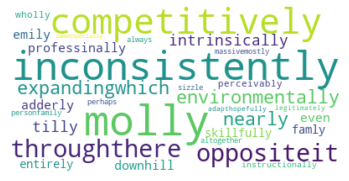

CLUSTER no.1


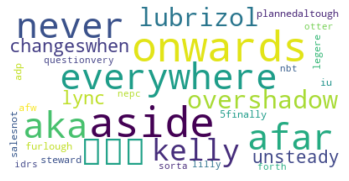

CLUSTER no.2


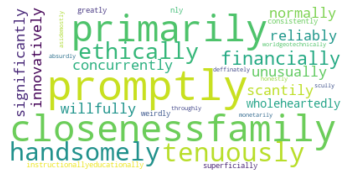

In [143]:
#Forming the clusters WordCloud
for i in range(0,3):
    word=" ".join(word for word in (dfs4[dfs4['CLUSTERS']==i].Adverbs.values))
    WC = WordCloud(max_font_size=50, max_words=30, background_color="White").generate(word)
    print('CLUSTER no.{}'.format(i))
    plt.imshow(WC, interpolation = 'bilinear') 
    plt.axis('off')
    plt.show()
    i+=1
